In [ ]:
## Imports

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingCVRegressor

from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [10]:
df_train = pd.read_csv("C:/Users/Casey/Downloads/train (1).csv")
df_test = pd.read_csv("C:/Users/Casey/Downloads/test.csv")

In [11]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### 1. Dimentions of the datasets

In [13]:
print("Train Dataset has ",df_train.shape[0],"Records/Rows and ",df_train.shape[1],"attributes/columns.")
print("Test Dataset has ",df_test.shape[0],"Records/Rows and ",df_test.shape[1],"attributes/columns.")

Train Dataset has  1460 Records/Rows and  81 attributes/columns.
Test Dataset has  1459 Records/Rows and  80 attributes/columns.


### 2. Generating Basic Information of Train Data.

In [15]:
df_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


📊 **Inference:**
- There is total **1460 records/rows and 81 attributes/columns.**
- Out of **81 columns, 38 columns are numerical and 43 columns are categorical.**

### 3. Performing Descriptive Statistical Analysis on Categorical Features.

In [18]:
df_train.describe(include="object")

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

📊 **Inference:**
- None of the **categorical features** are having high cardinality.
- Features like **Neighborhood, Exterior1st, Exterior2nd** are having little bit of high cardinality but that can be manged using different techniques of encoding.

### 4. Performing Descriptive Statistical Analysis on Numerical Features.

In [21]:
df_train.describe(include=[int,float])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

📊 **Inference:**
- Numerical Features like **LotArea, BsmtFinSF1,BsmtUnfSF, TotalBsmtSF,GrLivArea, MiscVal and even the target feature SalePrice** is having very high deviation values which can lead to bias, Overfitting, and can affect the accuracy of the model.
- So we have to use different transformation technique to reduce the deviation between the data-points.

## Data Preprocessing: Part 1

### 1. Showing Random Sample of the Dataset.

In [25]:
df_train.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
682    683         120       RL          NaN     2887   Pave   NaN      Reg   
919    920          20       RL         87.0    11029   Pave   NaN      IR1   
176    177          60       RL         97.0    10029   Pave   NaN      IR1   
464    465          20       RL         60.0     8430   Pave   NaN      Reg   
1296  1297          20       RL         80.0     8700   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
682          HLS    AllPub  ...        0    NaN    NaN         NaN       0   
919          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
176          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
464          HLS    AllPub  ...        0    NaN    NaN         NaN       0   
1296         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
682      11   2008        WD         Normal     173000  
919       5   2008        WD         Normal     176500  
176       9   2007        WD         Normal     211000  
464       8   2009        WD         Normal     124000  
1296     12   2008        WD         Normal     155000  

[5 rows x 81 columns]

📊 **Inference:**
- We can observe that feature **named Id** represnt a index number to each records in the dataset.
- This feature doesn't seem relevant for the analysis, so we can simply **drop this feature**

### 2. Dropping "Id" Feature.

In [28]:
test_id = df_test["Id"]    ##Storing test id because we need it for subission file.
df_train.drop(columns="Id",inplace=True)
df_test.drop(columns="Id",inplace=True)

### 3. Computing Features with Missing Values More Than 45%.

In [30]:
null_df = round(df_train.isnull().sum()/len(df_train)*100,2).sort_values().to_frame().rename(columns=
                                                                                    {0:"Train % of Missing Values"})
null_df["Test % of Missing Values"] = round(df_test.isnull().sum()/len(df_train)*100,2)

In [31]:
null_df[(null_df["Train % of Missing Values"]>45) | (null_df["Test % of Missing Values"]>45)]

Train % of Missing Values  Test % of Missing Values
FireplaceQu                      47.26                     50.00
MasVnrType                       59.73                     61.23
Fence                            80.75                     80.07
Alley                            93.77                     92.60
MiscFeature                      96.30                     96.44
PoolQC                           99.52                     99.73

📊 **Inference:**
- Features like **PoolQC,MiscFeature, Alley & Fence** are having large number of missing values.
- Data Imputation in features with large scale of misisng values can lead to **bias & noise** in the dataset.
- So we can simply **drop** those features with large scale of missing values.

### 4. Dropping Features with more than 45% of Missing Values

In [34]:
cols = ["FireplaceQu","Fence","Alley","MiscFeature","PoolQC"]

df_train.drop(columns=cols, inplace=True)
df_test.drop(columns=cols, inplace=True)

### 5. Combining Train & Test Dataset for Easier Analysis.

In [36]:
target = df_train[["SalePrice"]].reset_index(drop=True)

df_train.drop(columns=["SalePrice"],inplace=True)

df = pd.concat([df_train,df_test]).reset_index(drop=True)

In [37]:
df.shape

(2919, 74)

### 6. Computing Total Missing Values and % of Misisng Values.

In [39]:
null_df = df.isnull().sum()[df.isnull().sum()>0].sort_values().to_frame().rename(columns={0:"Total Missing values"})
null_df["% of Missing Values"] = round(null_df["Total Missing values"]/len(df)*100,2)
null_df["Feature Data Type"] = df[null_df.index.tolist()].dtypes

In [40]:
null_df

Total Missing values  % of Missing Values Feature Data Type
BsmtUnfSF                        1                 0.03           float64
GarageArea                       1                 0.03           float64
GarageCars                       1                 0.03           float64
KitchenQual                      1                 0.03            object
Electrical                       1                 0.03            object
TotalBsmtSF                      1                 0.03           float64
BsmtFinSF2                       1                 0.03           float64
BsmtFinSF1                       1                 0.03           float64
SaleType                         1                 0.03            object
Exterior1st                      1                 0.03            object
Exterior2nd                      1                 0.03            object
BsmtHalfBath                     2                 0.07           float64
Utilities                        2                 0.07            object
Functional                       2                 0.07            object
BsmtFullBath                     2                 0.07           float64
MSZoning                         4                 0.14            object
MasVnrArea                      23                 0.79           float64
BsmtFinType1                    79                 2.71            object
BsmtFinType2                    80                 2.74            object
BsmtQual                        81                 2.77            object
BsmtCond                        82                 2.81            object
BsmtExposure                    82                 2.81            object
GarageType                     157                 5.38            object
GarageCond                     159                 5.45            object
GarageYrBlt                    159                 5.45           float64
GarageFinish                   159                 5.45            object
GarageQual                     159                 5.45            object
LotFrontage                    486                16.65           float64
MasVnrType                    1766                60.50            object

📊 **Inference:**
- Total **29 columns** are still having missing values.
- We will fill missing values separately in **categorical and Numerical Columns.**

### 7. Filling Missing Values in Features realted to Garage & Basement.

In [43]:
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    df[col] = df[col].fillna(0)

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('None')

for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df[col] = df[col].fillna('None')

### 8. Filling Missing Values in Categorical Columns.

In [45]:
df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [46]:
cat_cols = ['Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical',
            'KitchenQual','Functional','SaleType']

imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = imputer.fit_transform(df[cat_cols])

### 9. Filling Missing Values in Numerical Columns.

In [48]:
df["LotFrontage"] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df["MasVnrArea"]  = df.groupby("MasVnrType")["MasVnrArea"].transform(lambda x: x.fillna(x.median()))
df["BsmtFinSF1"]  = df.groupby("BsmtFinType1")["BsmtFinSF1"].transform(lambda x: x.fillna(x.median()))
df["BsmtFinSF2"]  = df.groupby("BsmtFinType2")["BsmtFinSF2"].transform(lambda x: x.fillna(x.median()))

In [49]:
df["BsmtFullBath"] = df["BsmtFullBath"].fillna(0.0)
df["BsmtHalfBath"] = df["BsmtHalfBath"].fillna(0.0)
df["TotalBsmtSF"]  = df["BsmtFinSF1"] + df["BsmtFinSF2"]
df["BsmtUnfSF"]    = df["BsmtUnfSF"].fillna(df["BsmtUnfSF"].median())

### 10. Confirming Filling of Missing Values.

In [51]:
print("Total Missing Values Left is:",df.isnull().sum().sum())

Total Missing Values Left is: 0


### 11. Separating Train and Test Datframe.

In [53]:
train_df = pd.concat([df.iloc[:len(target["SalePrice"]),:],target],axis=1)
test_df = df.iloc[len(target["SalePrice"]):,:]

In [54]:
print("Dimension of train data is:",train_df.shape)
print("Dimension of test data is:",test_df.shape)

Dimension of train data is: (1460, 75)
Dimension of test data is: (1459, 74)


## Exploratory Data Analysis

### 1. Analyzing & Visualizing Target Varibele (SalePrice).

In [57]:
train_df["SalePrice"].describe().to_frame().T

count          mean           std      min       25%       50%  \
SalePrice  1460.0  180921.19589  79442.502883  34900.0  129975.0  163000.0   

                75%       max  
SalePrice  214000.0  755000.0

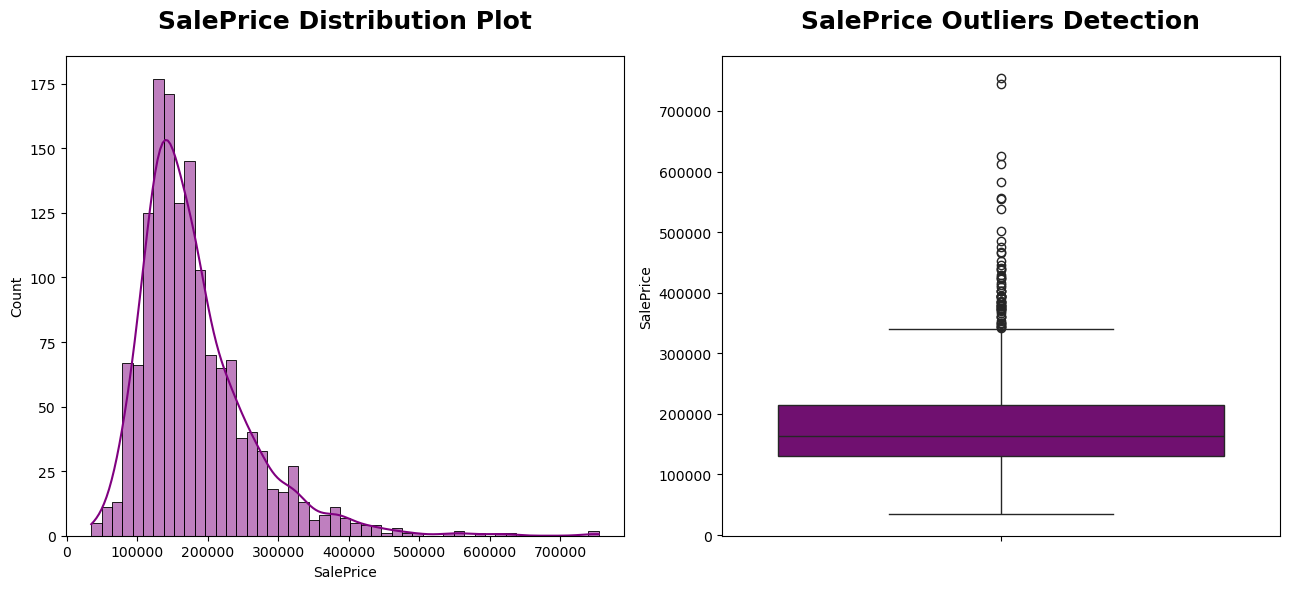

In [58]:
plt.figure(figsize=(13,6))

plt.subplot(1,2,1)
sns.histplot(train_df["SalePrice"],color="purple",kde=True)
plt.title("SalePrice Distribution Plot",fontweight="black",pad=20,size=18)

plt.subplot(1,2,2)
sns.boxplot(train_df["SalePrice"],color="purple")
plt.title("SalePrice Outliers Detection",fontweight="black",pad=20,size=18)
plt.tight_layout()
plt.show()

📊 **Inference:**
- The target feature is having a **right-skewed distribution** due to presence of positive outliers.
- It is apparent that SalePrice doesn't follow normal distribution**, so before performing regression it has to be transformed.
- To achieve a **Normal Distribution** we can use different transformation techniques like: **Johnsonsu Transformation, Norm Transformation or Log Noraml Transformation**
- From these three tansformation which ever gives best fit we can use that transformation.

### 2. Visualizing Different Transformation Techniques on "SalePrice" Attribute.

C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\2142173025.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["SalePrice"],kde=False, fit=stats.johnsonsu,color="red")
C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\2142173025.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trai

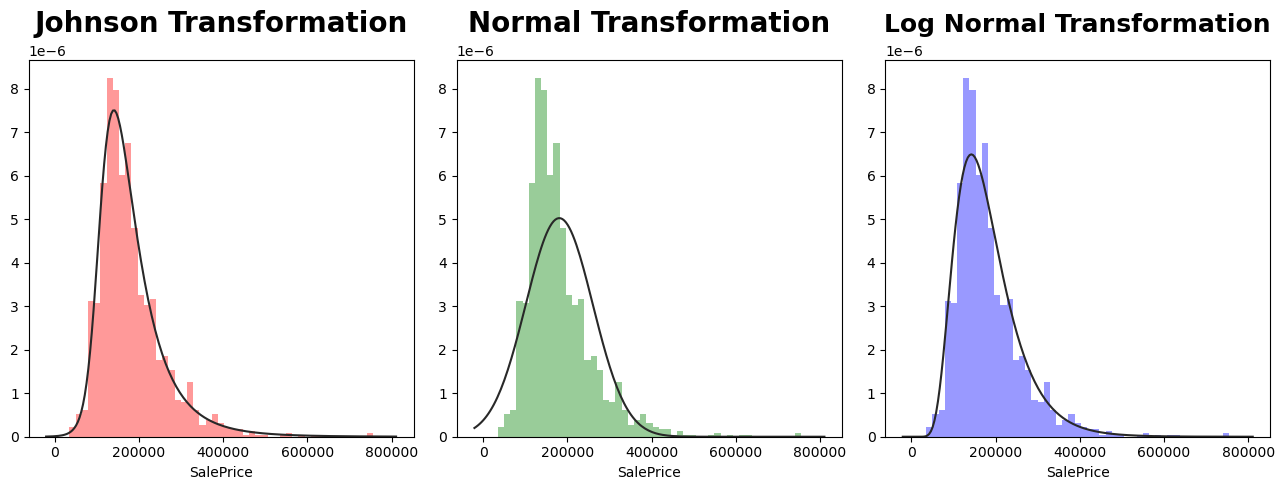

In [61]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
sns.distplot(train_df["SalePrice"],kde=False, fit=stats.johnsonsu,color="red")
plt.title("Johnson Transformation",fontweight="black",size=20,pad=20)

plt.subplot(1,3,2)
sns.distplot(train_df["SalePrice"],kde=False, fit=stats.norm,color="green")
plt.title("Normal Transformation",fontweight="black",size=20,pad=20)

plt.subplot(1,3,3)
sns.distplot(train_df["SalePrice"],kde=False,fit=stats.lognorm,color="blue")
plt.title("Log Normal Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

📊 **Inference:**
- After applying different transformation techniques the best result were given by **Unbounded Johnson Transformation.**
- But the **Log Normal Transformation** has also done a good job to achieve a normal distribution.

### 3. Visualizing Distribution of Continous Numerical Features.

In [64]:
con_cols = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF",
            "1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF",
            "EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"]

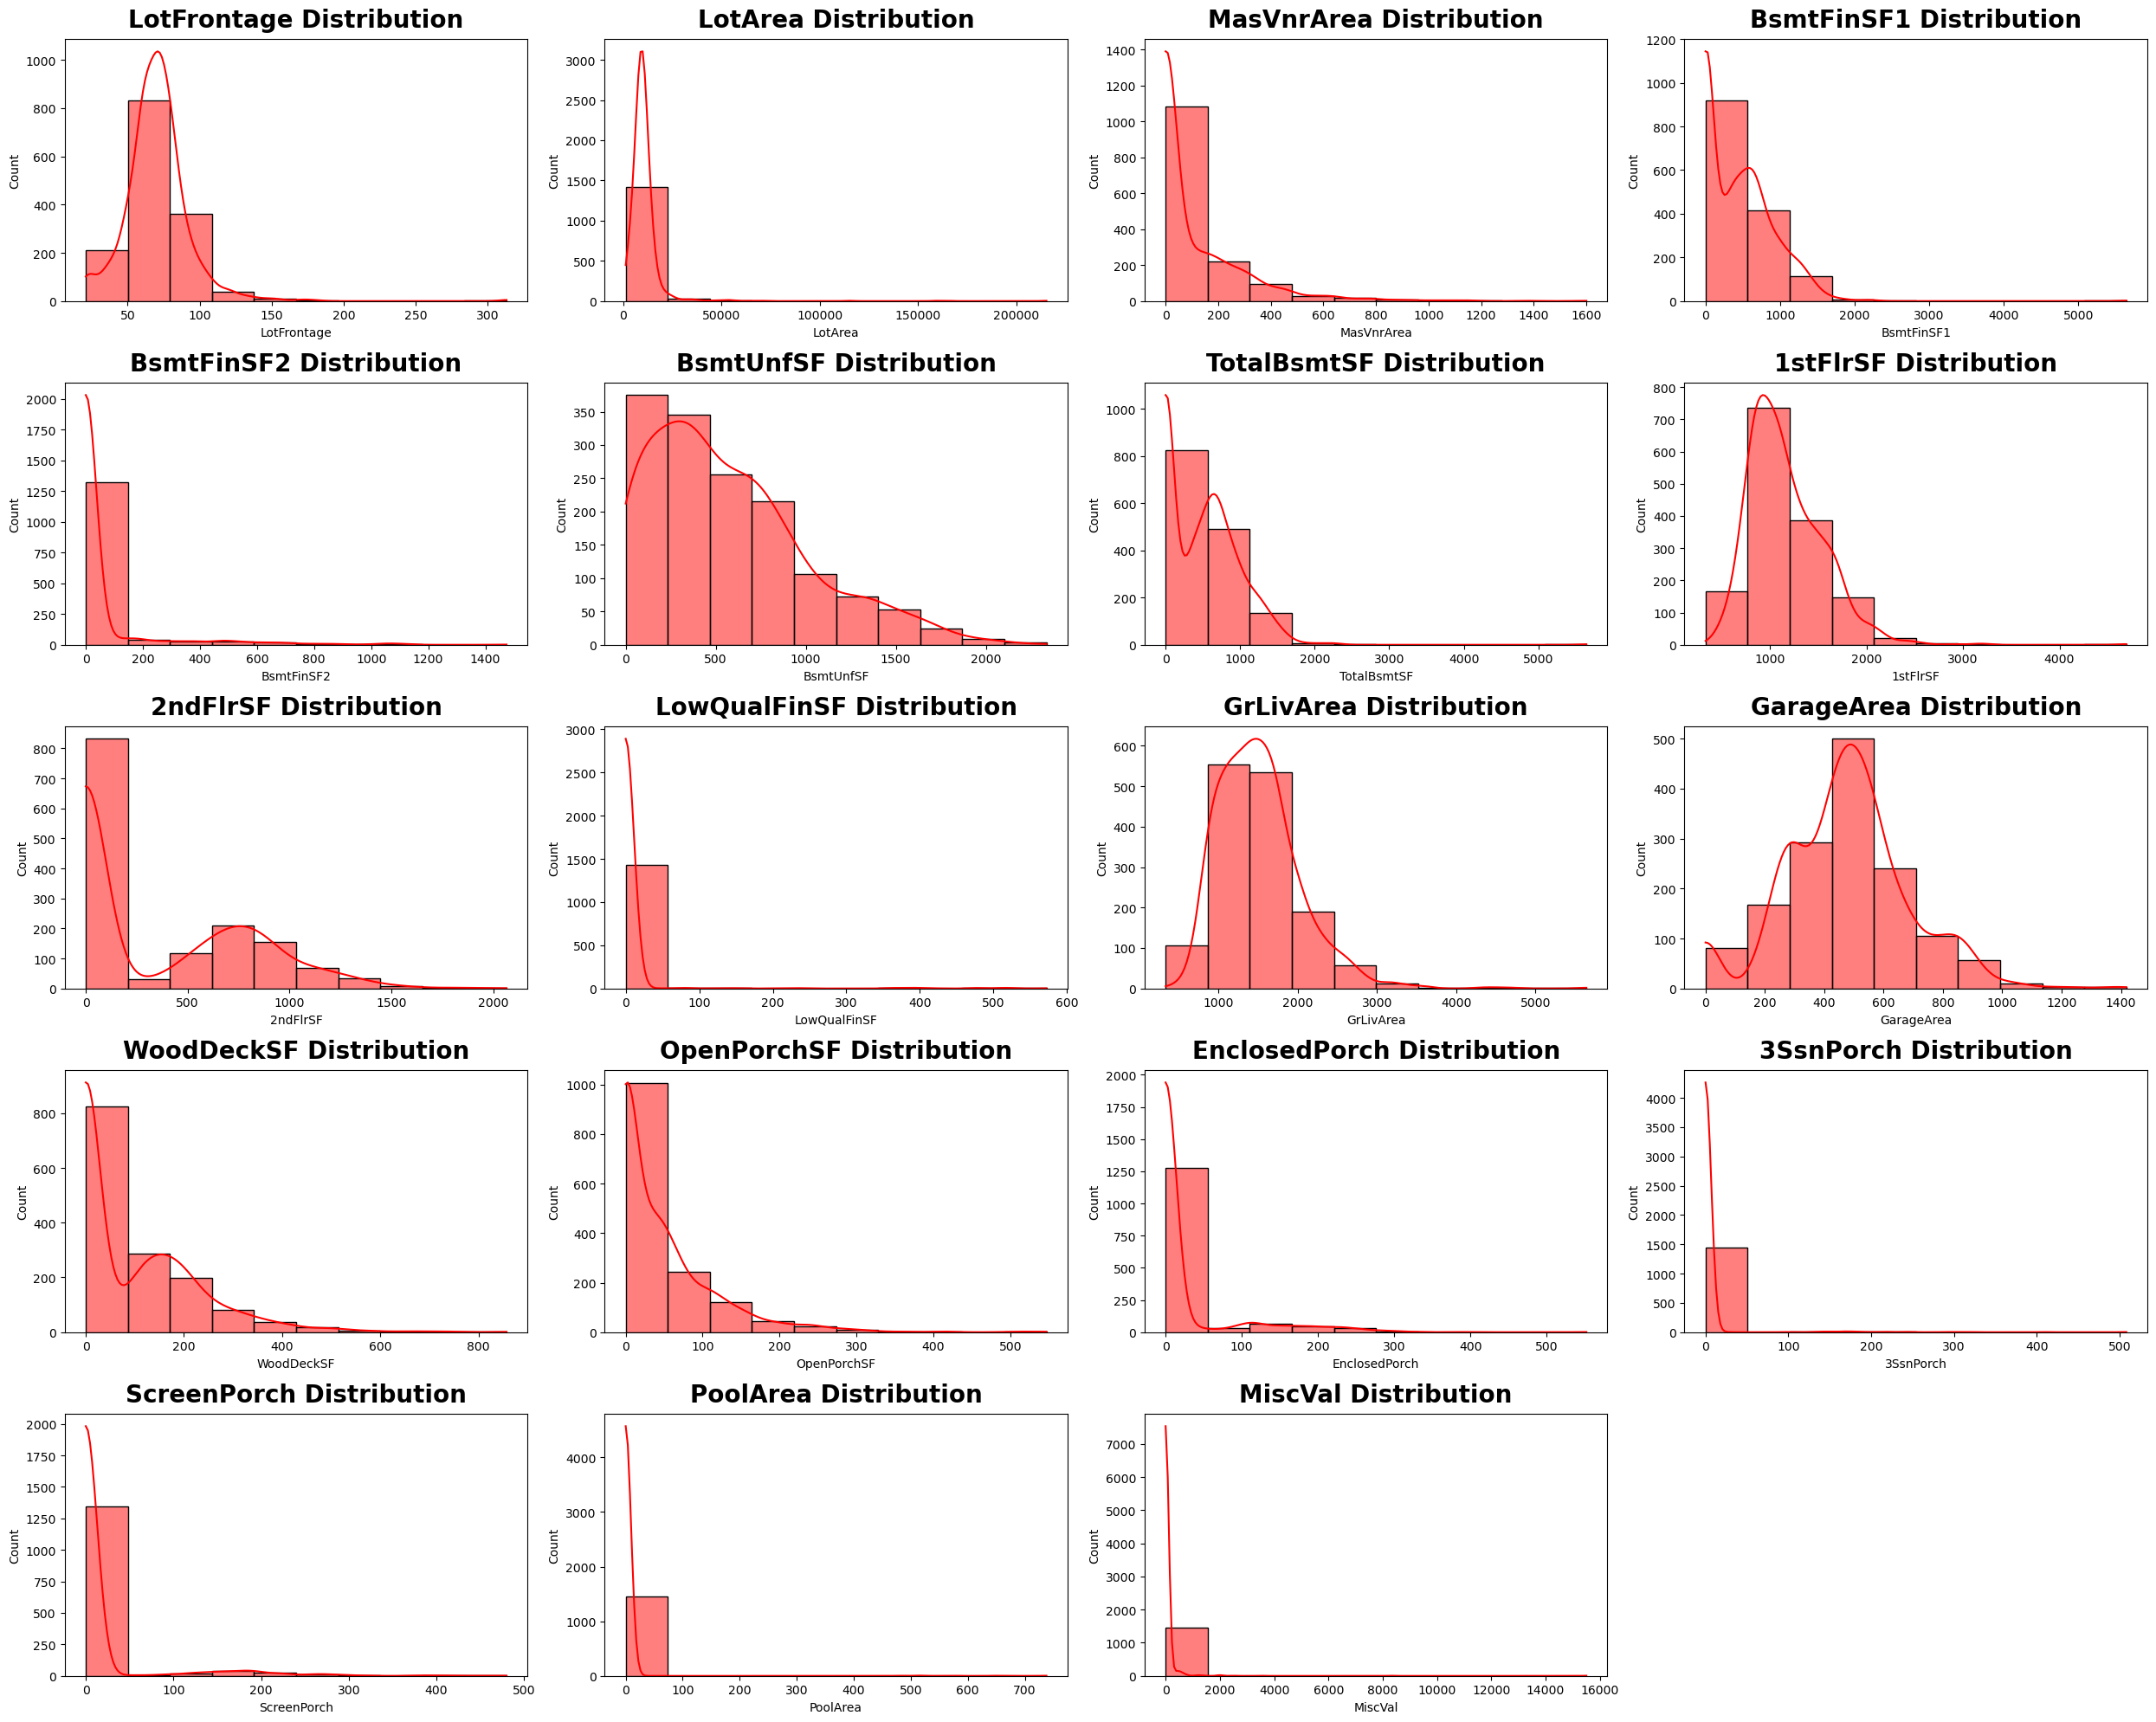

In [65]:
plt.figure(figsize=(25,20))
for index,column in enumerate(con_cols):
    plt.subplot(5,4,index+1)
    sns.histplot(train_df[column],bins=10,kde=True,color="red")
    plt.title(f"{column} Distribution",fontweight="black",size=20,pad=10)
    plt.tight_layout()

📊 **Inference:**
- **GargeArea** Feature is having a kind of **Normal Distribution.**
- None of the other featurs is having a **normal distribution** and all the features is **right-skewed.**
- We know that Linear regression models assume a linear relationship between the predictors and the response variable.
- Since the relationship is non-linear, transforming the variables can help capture and represent the underlying non-linear relationship more accurately.

### 4. Visualizing the Skewness of Continous Numerical Features

C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\2627696010.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= skewness.index, y= skewness, palette=sns.color_palette("Reds",19))


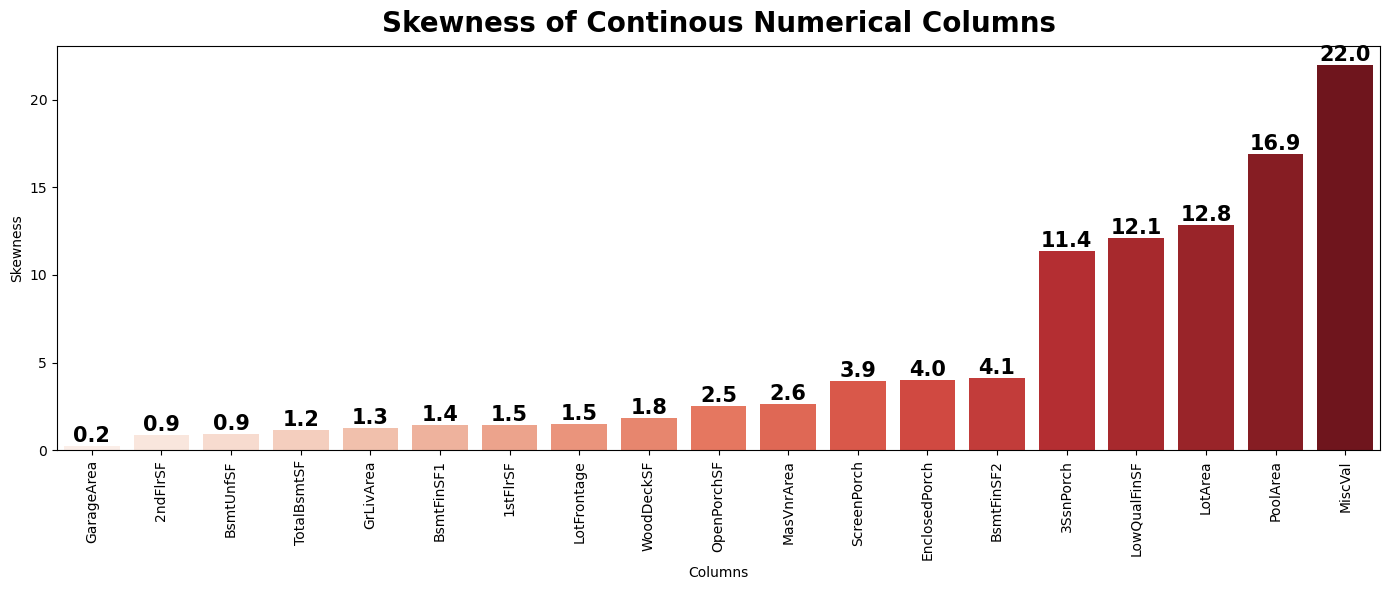

In [68]:
skewness = df[con_cols].skew().sort_values()

plt.figure(figsize=(14,6))
sns.barplot(x= skewness.index, y= skewness, palette=sns.color_palette("Reds",19))
for i, v in enumerate(skewness):
    plt.text(i, v, f"{v:.1f}", ha="center", va="bottom",size=15,fontweight="black")

plt.ylabel("Skewness")
plt.xlabel("Columns")
plt.xticks(rotation=90)
plt.title("Skewness of Continous Numerical Columns",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

📊 **Inference:**
- Features like **3SsnPorch,LowQualFinSF,LotArea,PoolArea and MiscVal** are having extremly high skewness which can create model-complexity.
- We know that skewness should be near to zero for a **normal distrbution** to achieve that we can use different transformations.

### 5. Visualizing the Correlation of Continous Numerical Features.

In [71]:
con_cols.append("SalePrice")

C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\4186286728.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= corr.index, y= corr, palette=["lightcoral" if v < 0 else "lightgreen" for v in corr])


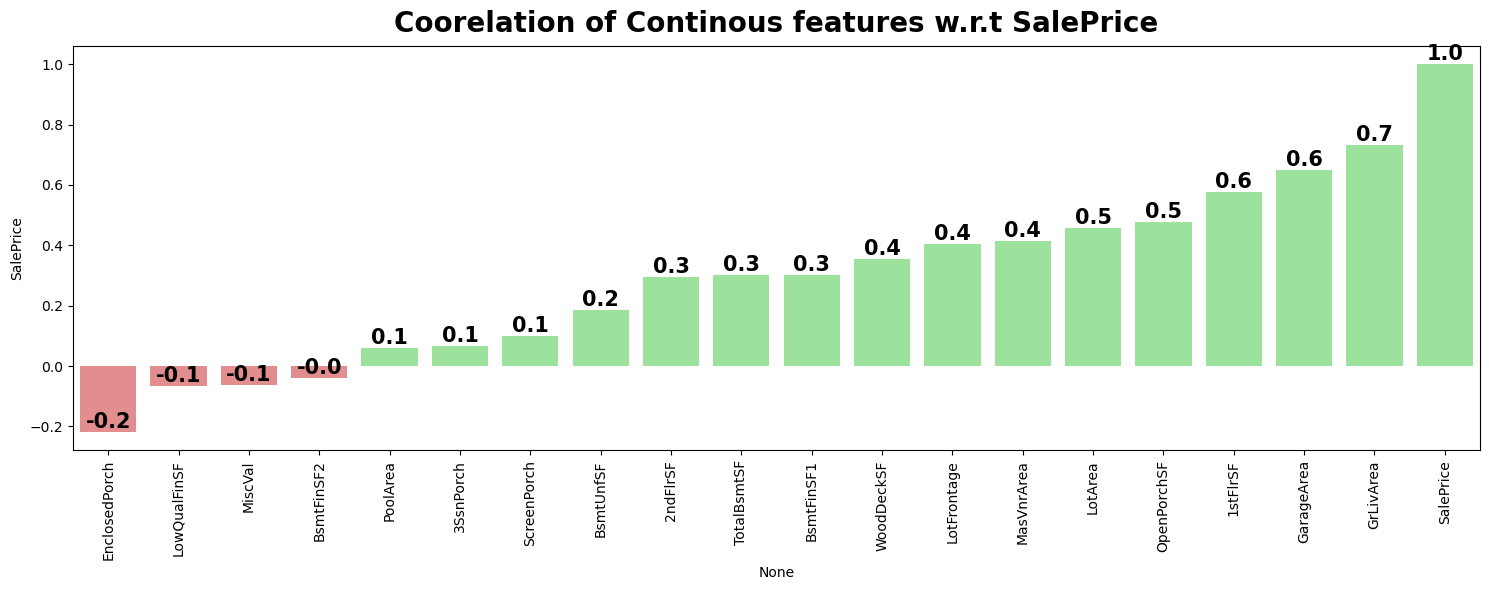

In [72]:
corr = train_df[con_cols].corr(method="spearman")["SalePrice"].sort_values()

plt.figure(figsize=(15,6))
sns.barplot(x= corr.index, y= corr, palette=["lightcoral" if v < 0 else "lightgreen" for v in corr])
for i, v in enumerate(corr):
    plt.text(i, v, f"{v:.1f}", ha="center", va="bottom",size=15,fontweight="black")

plt.title("Coorelation of Continous features w.r.t SalePrice",fontweight="black",size=20,pad=10)
plt.xticks(rotation=90)
plt.tight_layout()

📊 **Inference:**
- Features like **1stFlrSF,GrLivArea,and GarageArea** are having strong relation with the target variable.
- Features like **WoodDeckSF,LotDrontage,and MasVnrArea** are having modearte relation with the target varible.
- Features like **LowQualFinSF,MiscVal,BsmtFinSF2,PoolArea,3SsnPorch,and ScreenPorch** are having very low relation with the target variable. So if required we can drop this features

### 6. Visualizing Categorical Features w.r.t SalePrice.

In [75]:
cat_cols = train_df.select_dtypes(include="object").columns.tolist()

In [76]:
def boxplot(col_list):
    plt.figure(figsize=(22,12))
    for index,column in enumerate(col_list):
        plt.subplot(2,4,index+1)
        sns.boxplot(x=column, y="SalePrice", data=train_df)
        plt.title(f"{column} vs SalePrice",fontweight="black",pad=10,size=20)
        plt.xticks(rotation=90)
        plt.tight_layout()

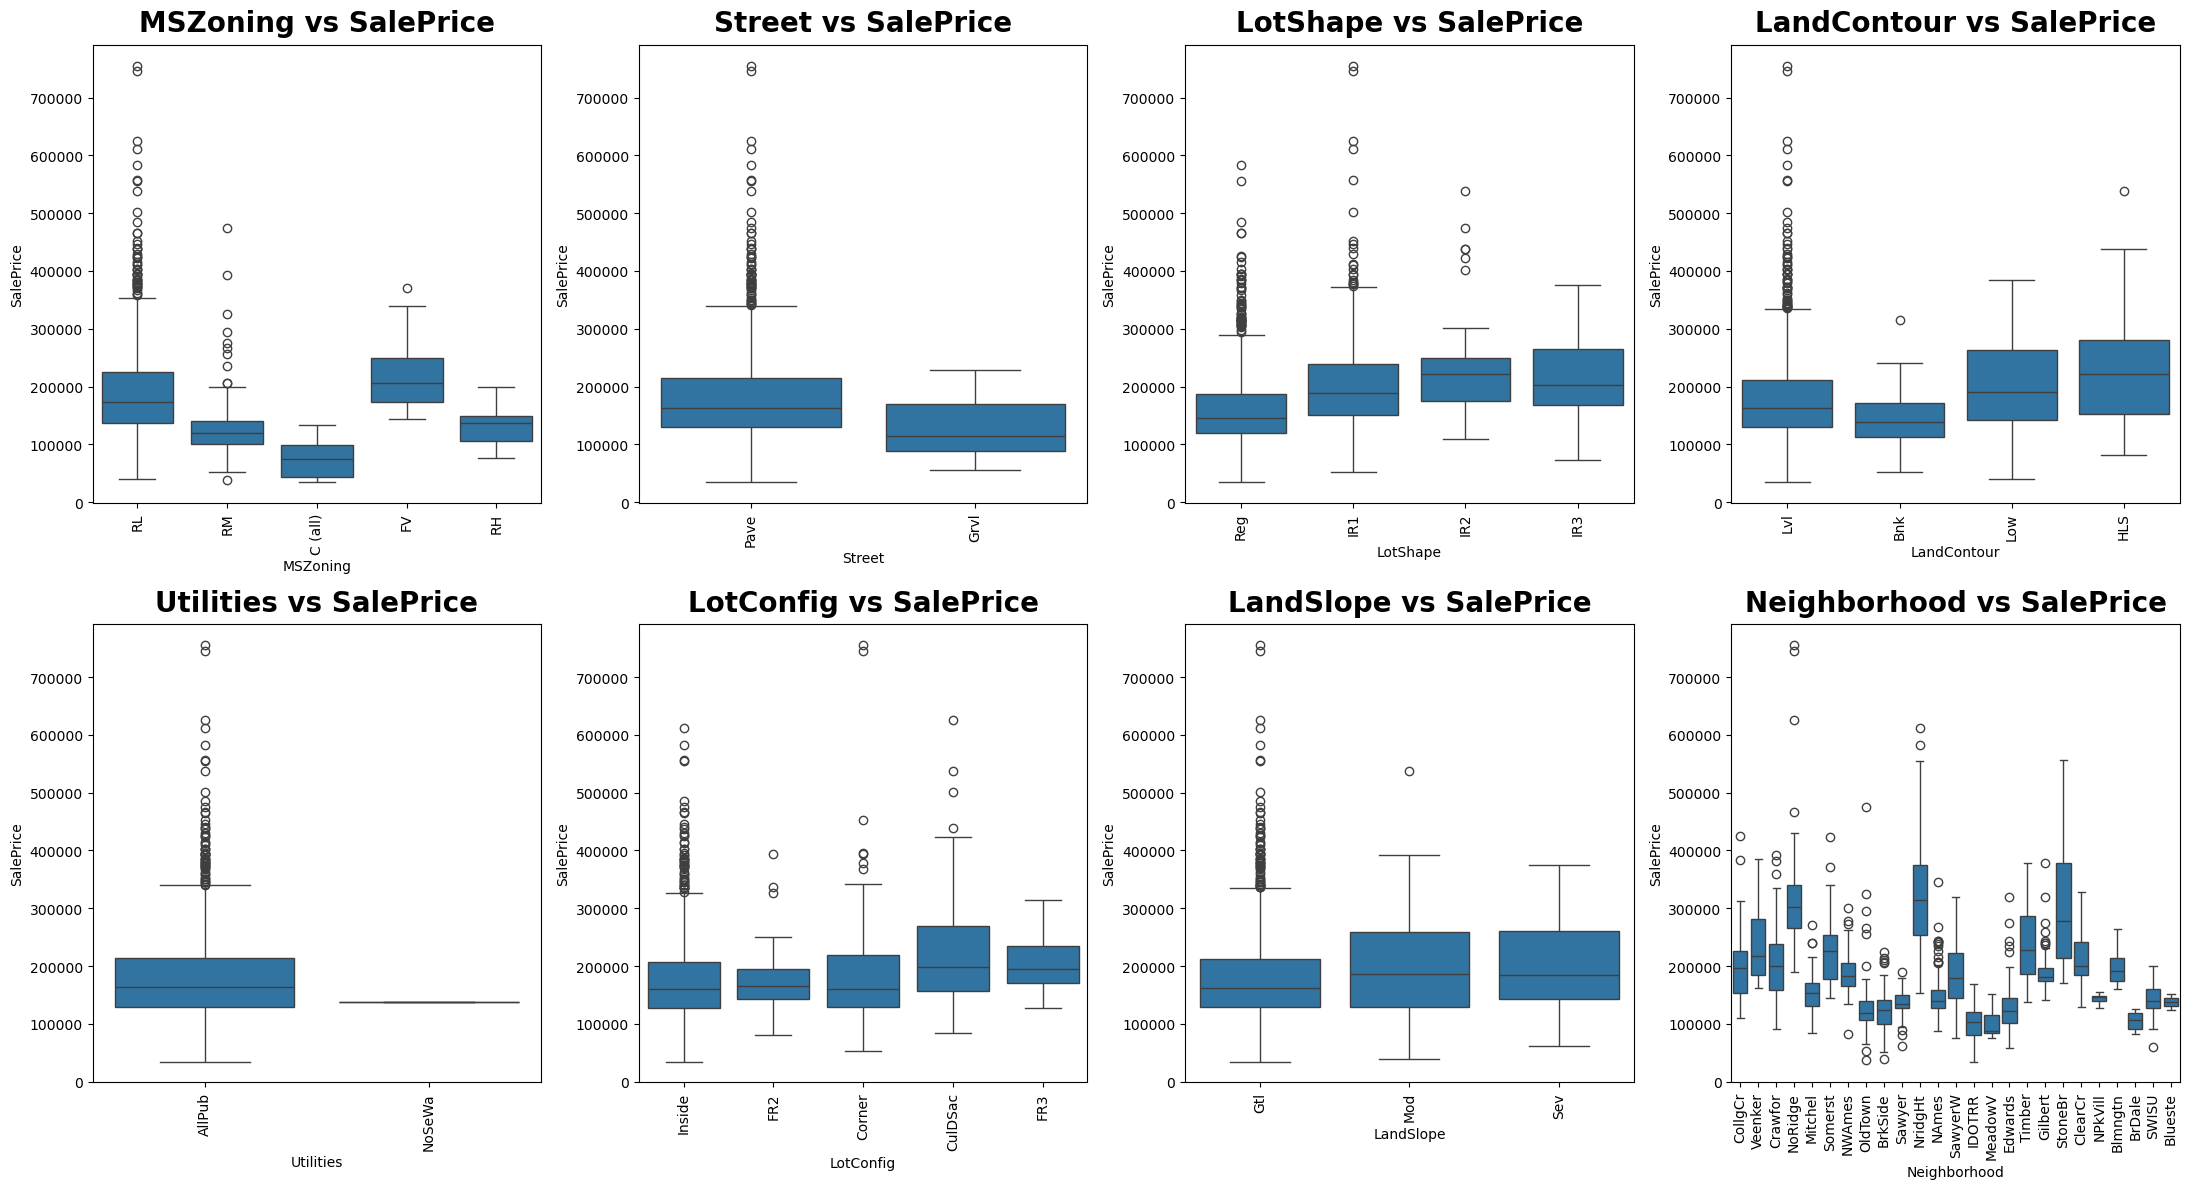

In [77]:
boxplot(cat_cols[0:8])

📊 **Inference:**
- Features like **Utilities and Street** are having very **high class imbalance.** So we can simply drop this features.
- Neighborhood feature is having **high cardinality**, So we have to perform Target Encoding on this feature.

### Dropping Columns with High Class-Imbalance.

In [80]:
train_df.loc[:, ["Utilities", "Street"]] = train_df.loc[:, ["Utilities", "Street"]].drop(columns=["Utilities", "Street"])
test_df.loc[:, ["Utilities", "Street"]] = test_df.loc[:, ["Utilities", "Street"]].drop(columns=["Utilities", "Street"])

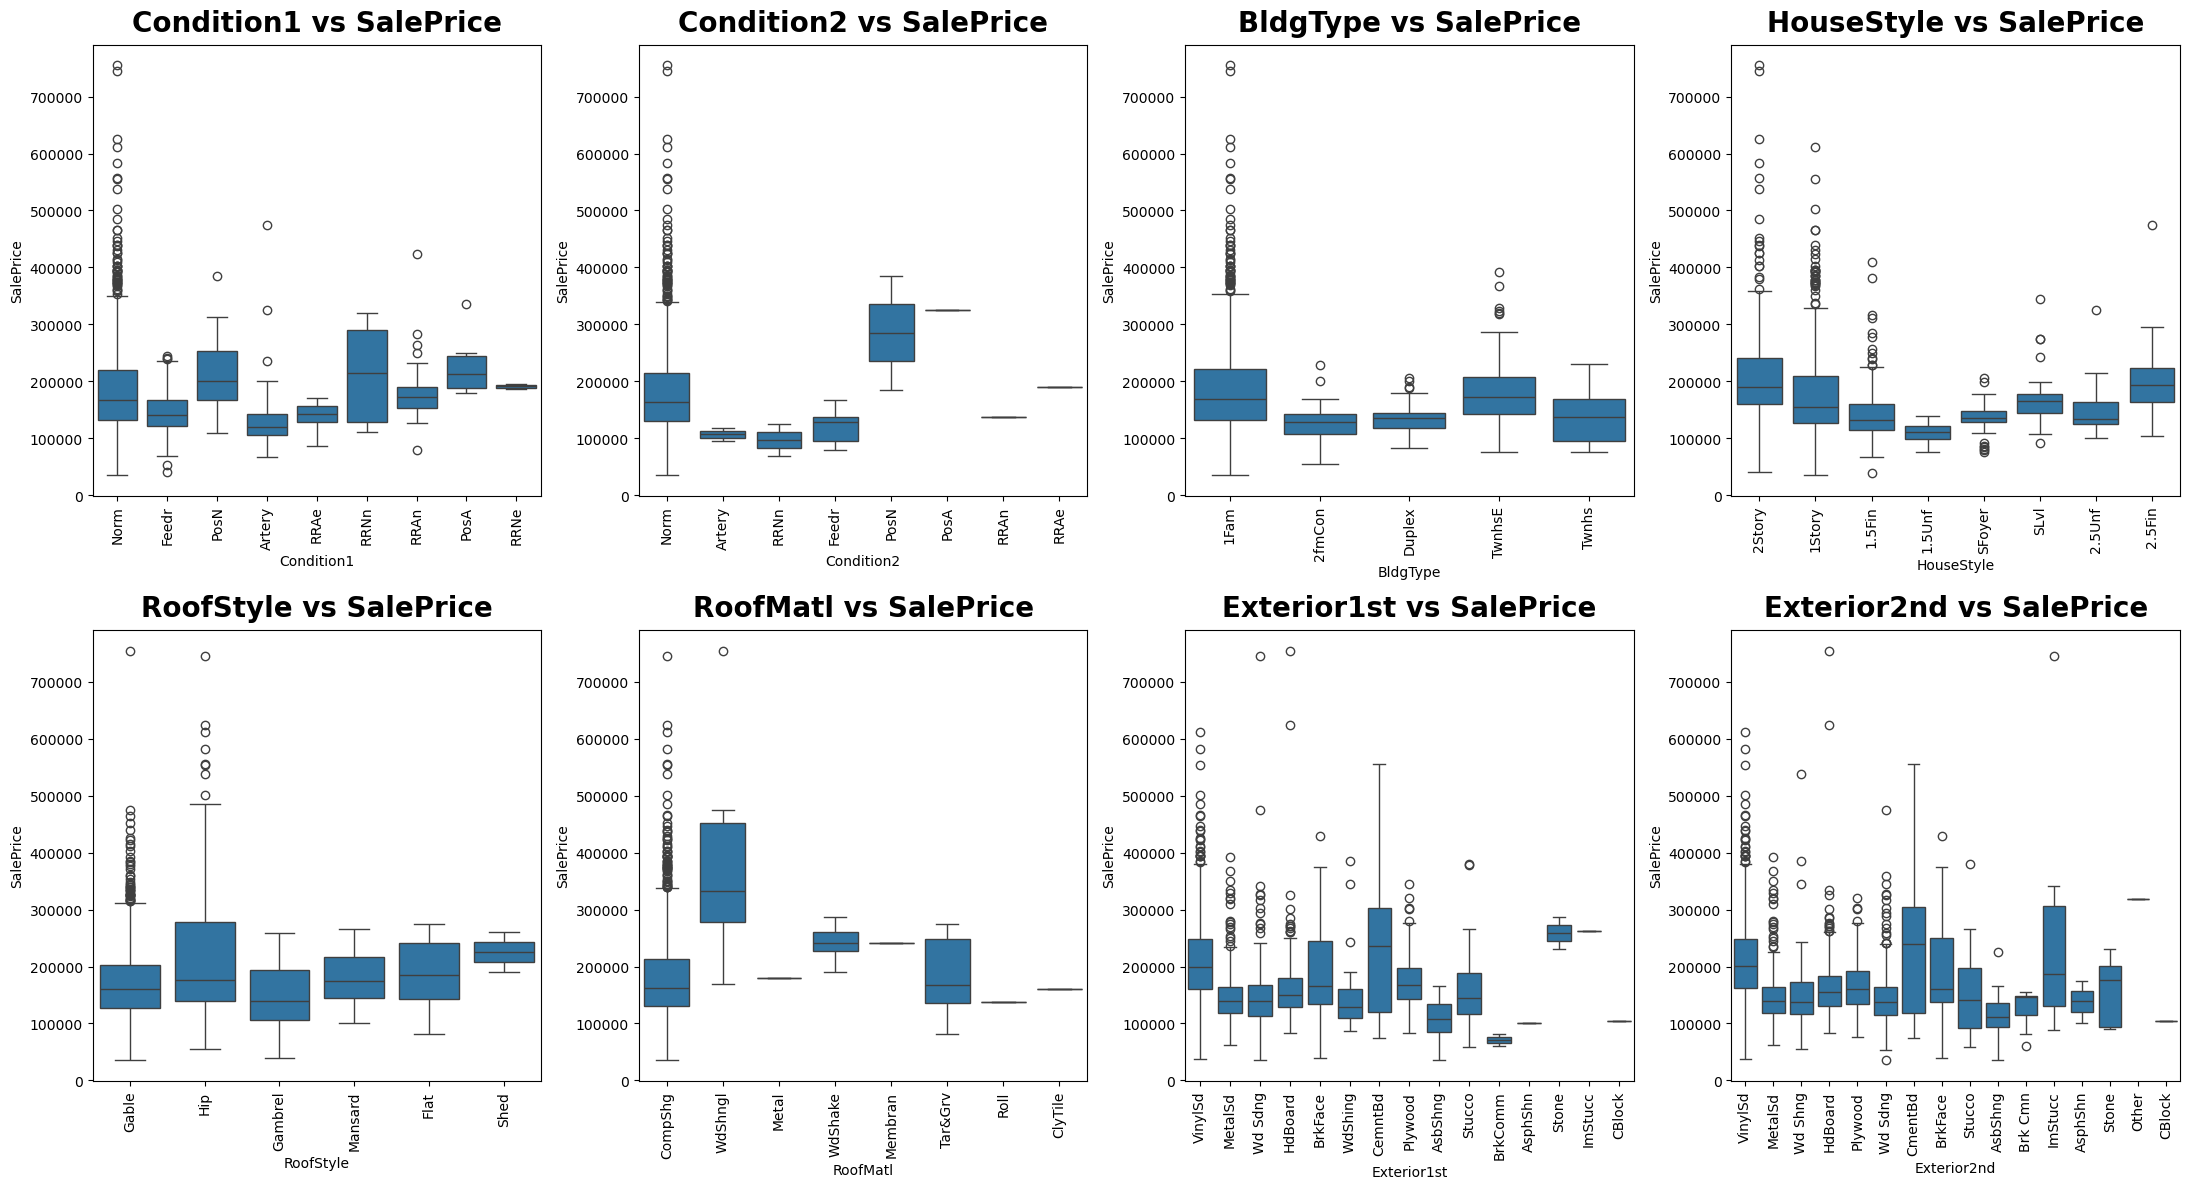

In [81]:
boxplot(cat_cols[8:16])

📊 **Inference:**
- Features like **Condition2 and RoofMatl** are having very **high class imbalance.**
- We can drop **RooftMatl** feature and we will fo feature engineering on **condition2** to reduce the class-imbalance.

### Dropping feature with high class-imbalance.

In [84]:
train_df.loc[:, ["RoofMatl"]] = train_df.loc[:, ["RoofMatl"]].drop(columns=["RoofMatl"])
test_df.loc[:, ["RoofMatl"]] = test_df.loc[:, ["RoofMatl"]].drop(columns=["RoofMatl"])

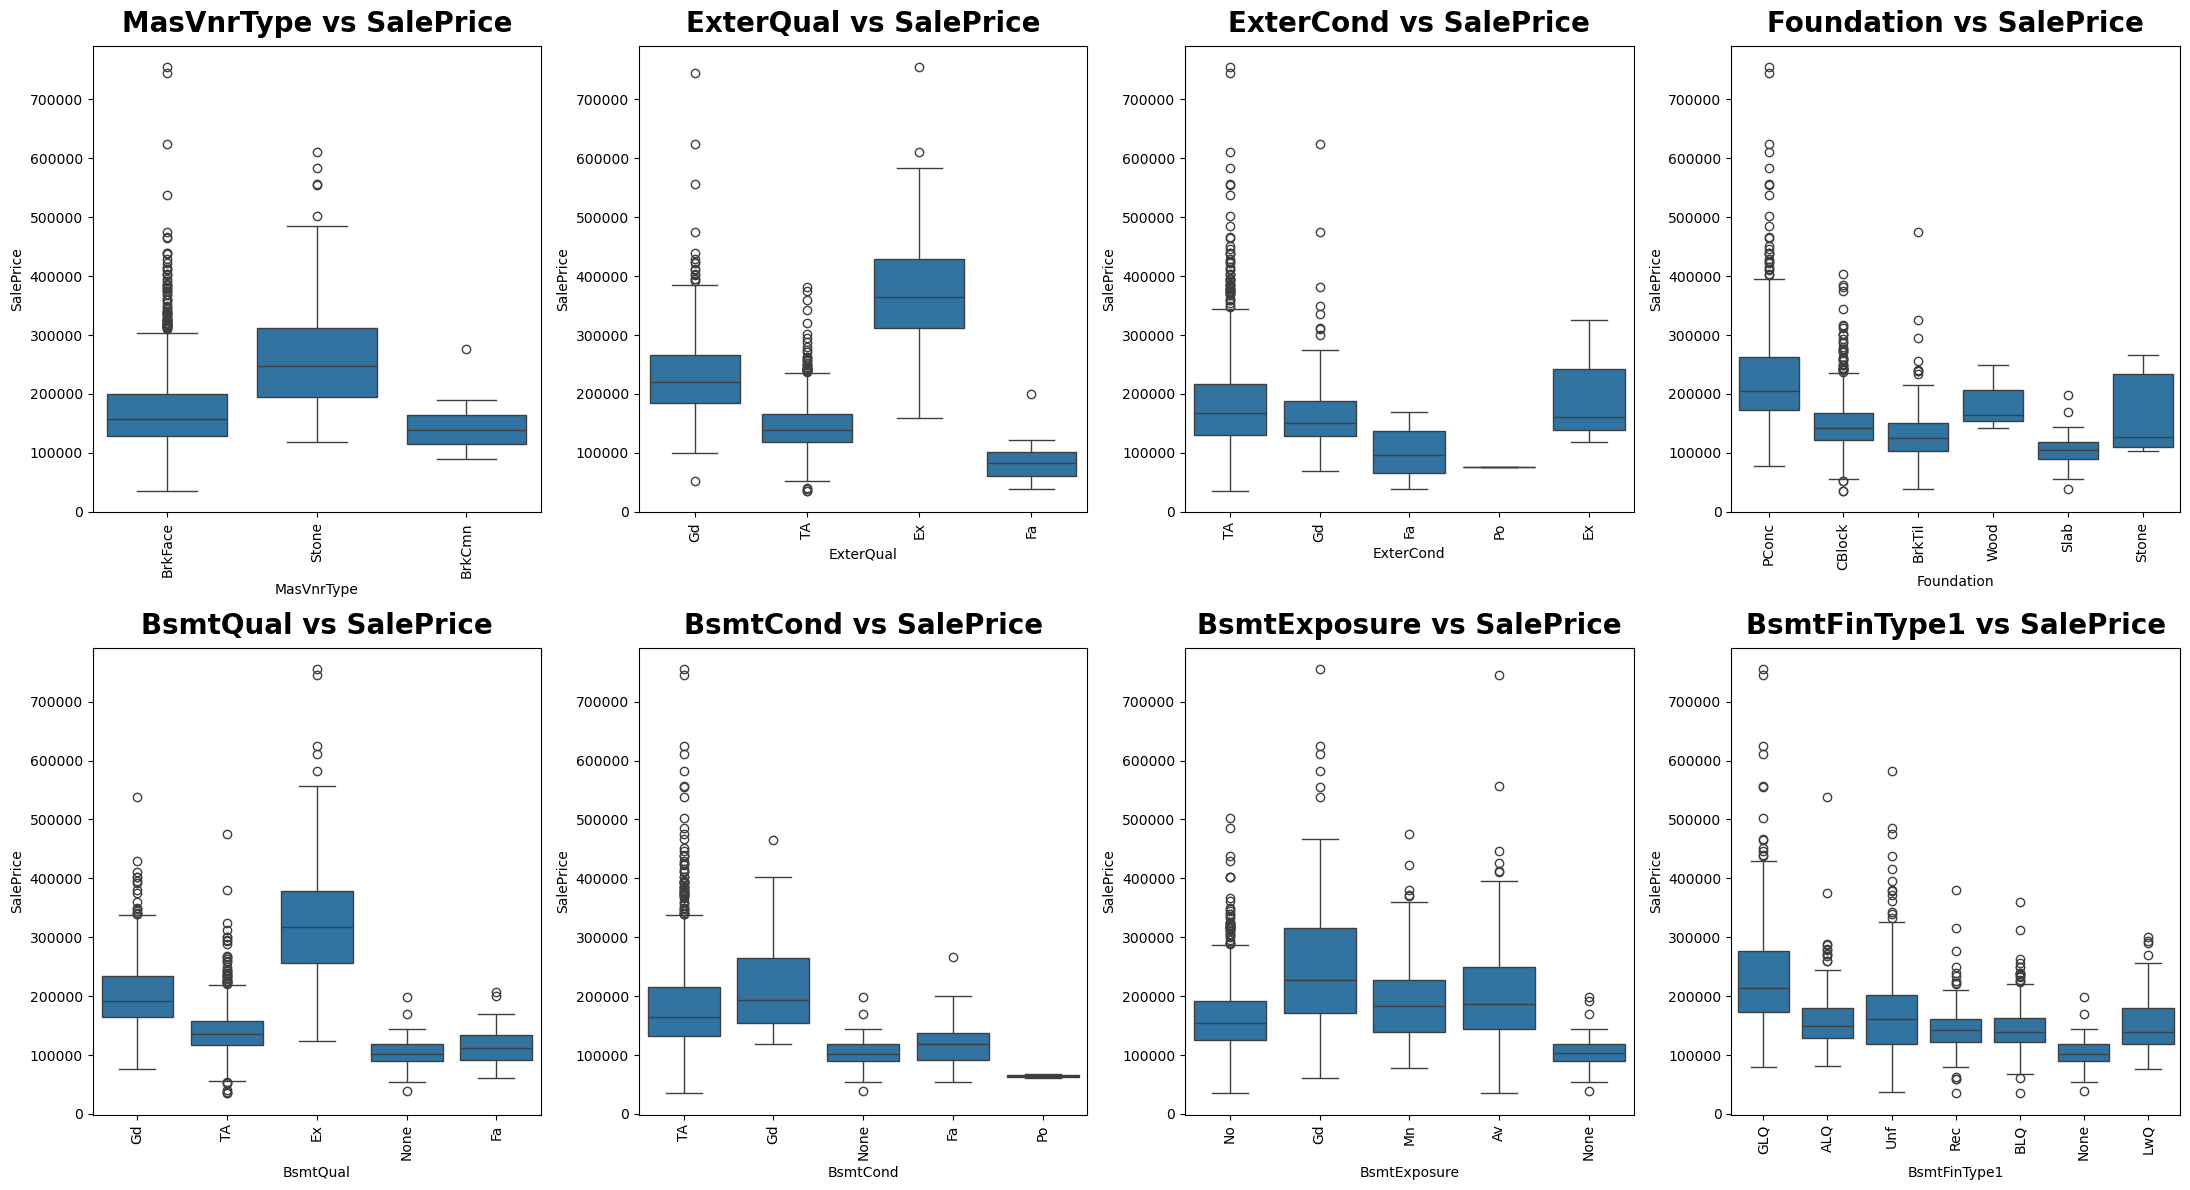

In [85]:
boxplot(cat_cols[16:24])

📊 **Inference:**
- All the **features** in above visualization seems very useful for predicting the price of house.
- The only thing is that we have to perform **enconding** before model training.

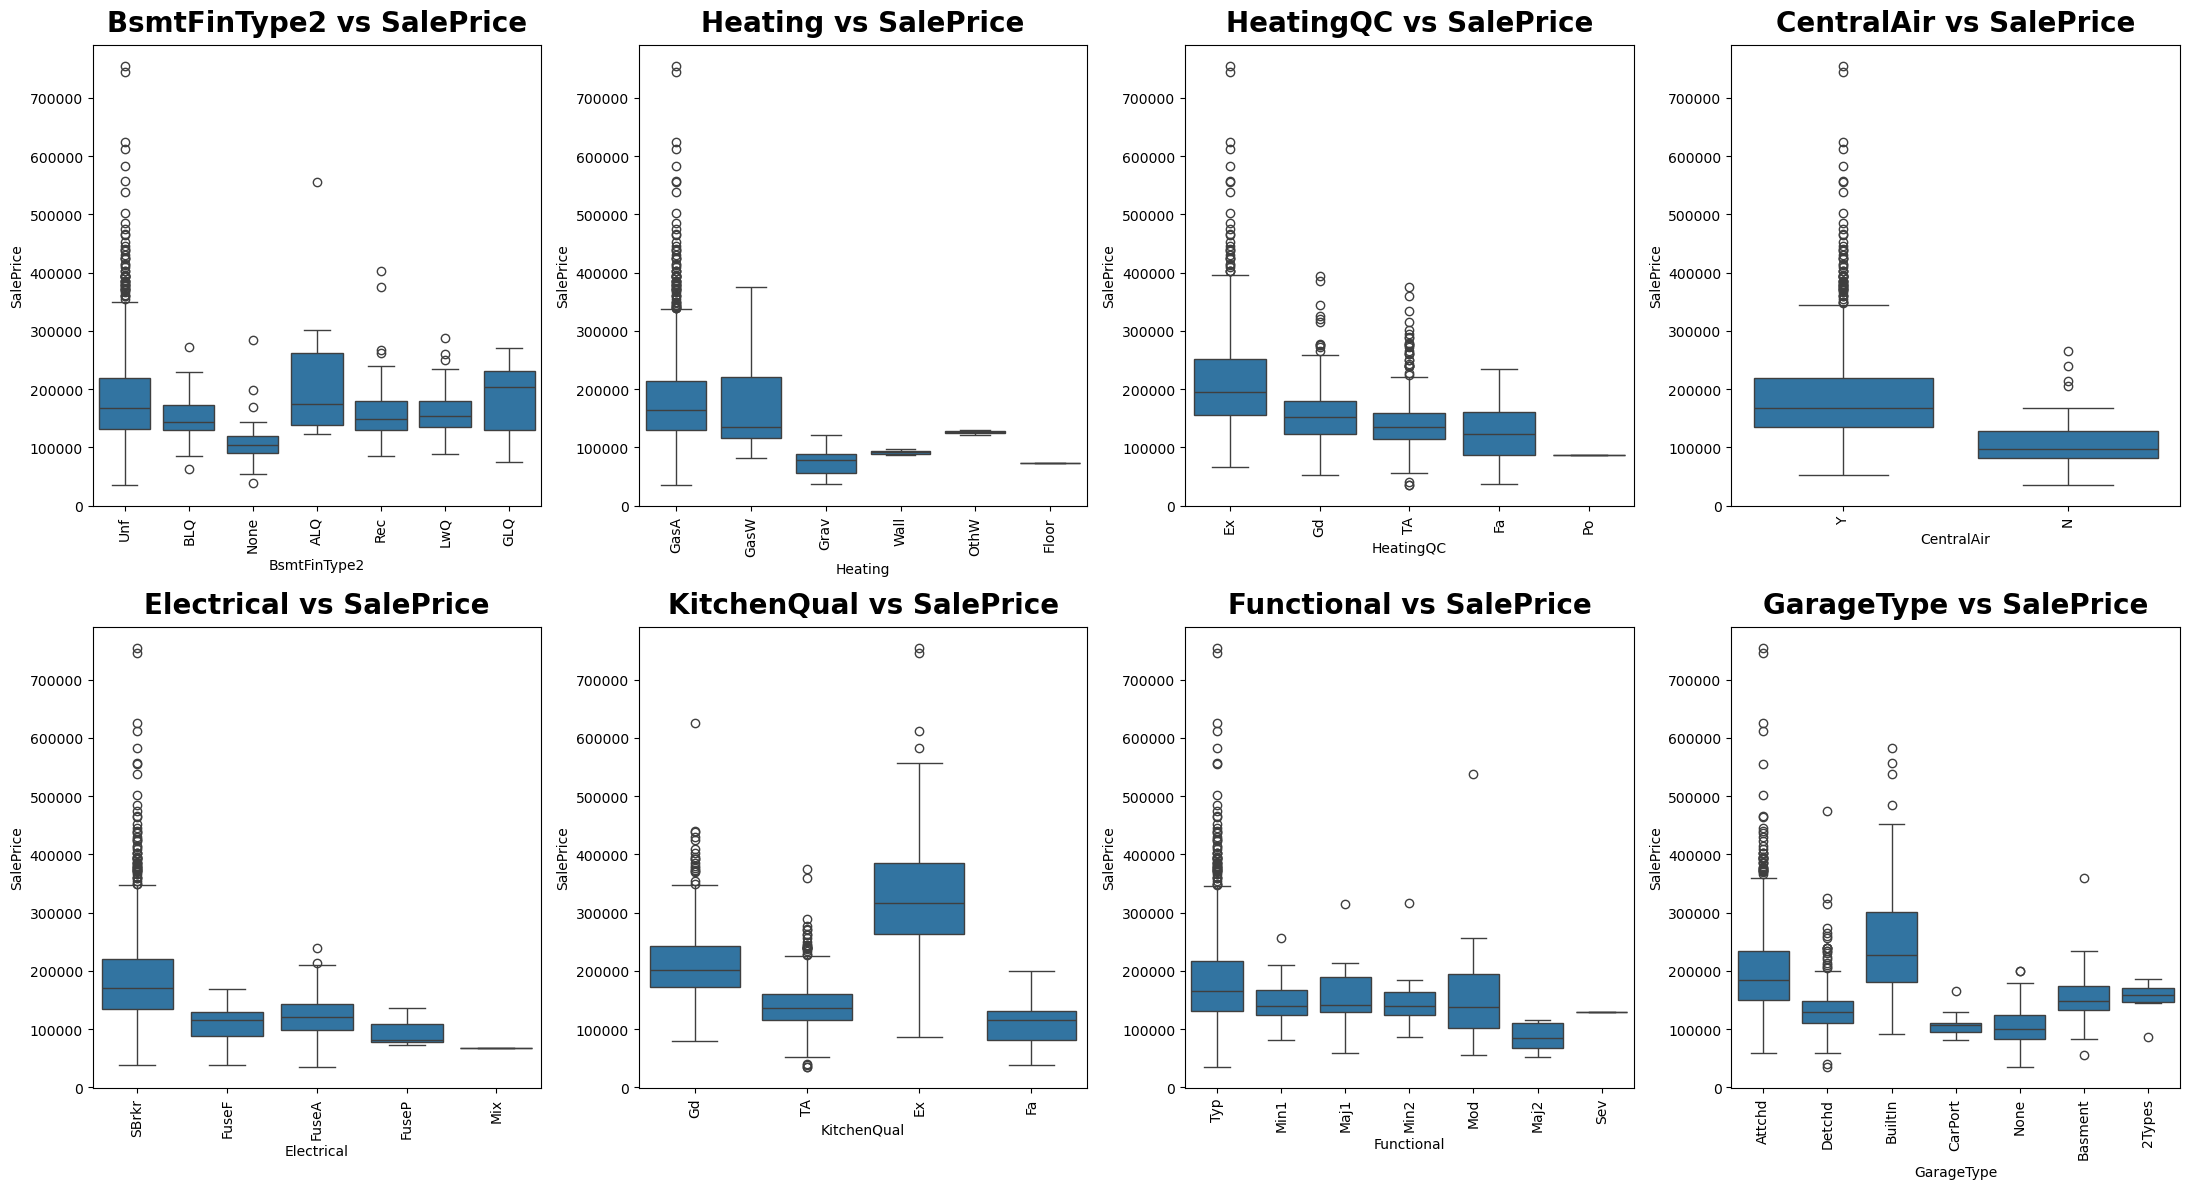

In [87]:
boxplot(cat_cols[24:32])

📊 **Inference:**
- Features Heating is having a **class imbalance.** But **heating** is a important feature for people buying house.
- Hence we can perform feature engineering to **reduce the class-imbalance.**
- Rest all the other features seems useful for house price prediction.

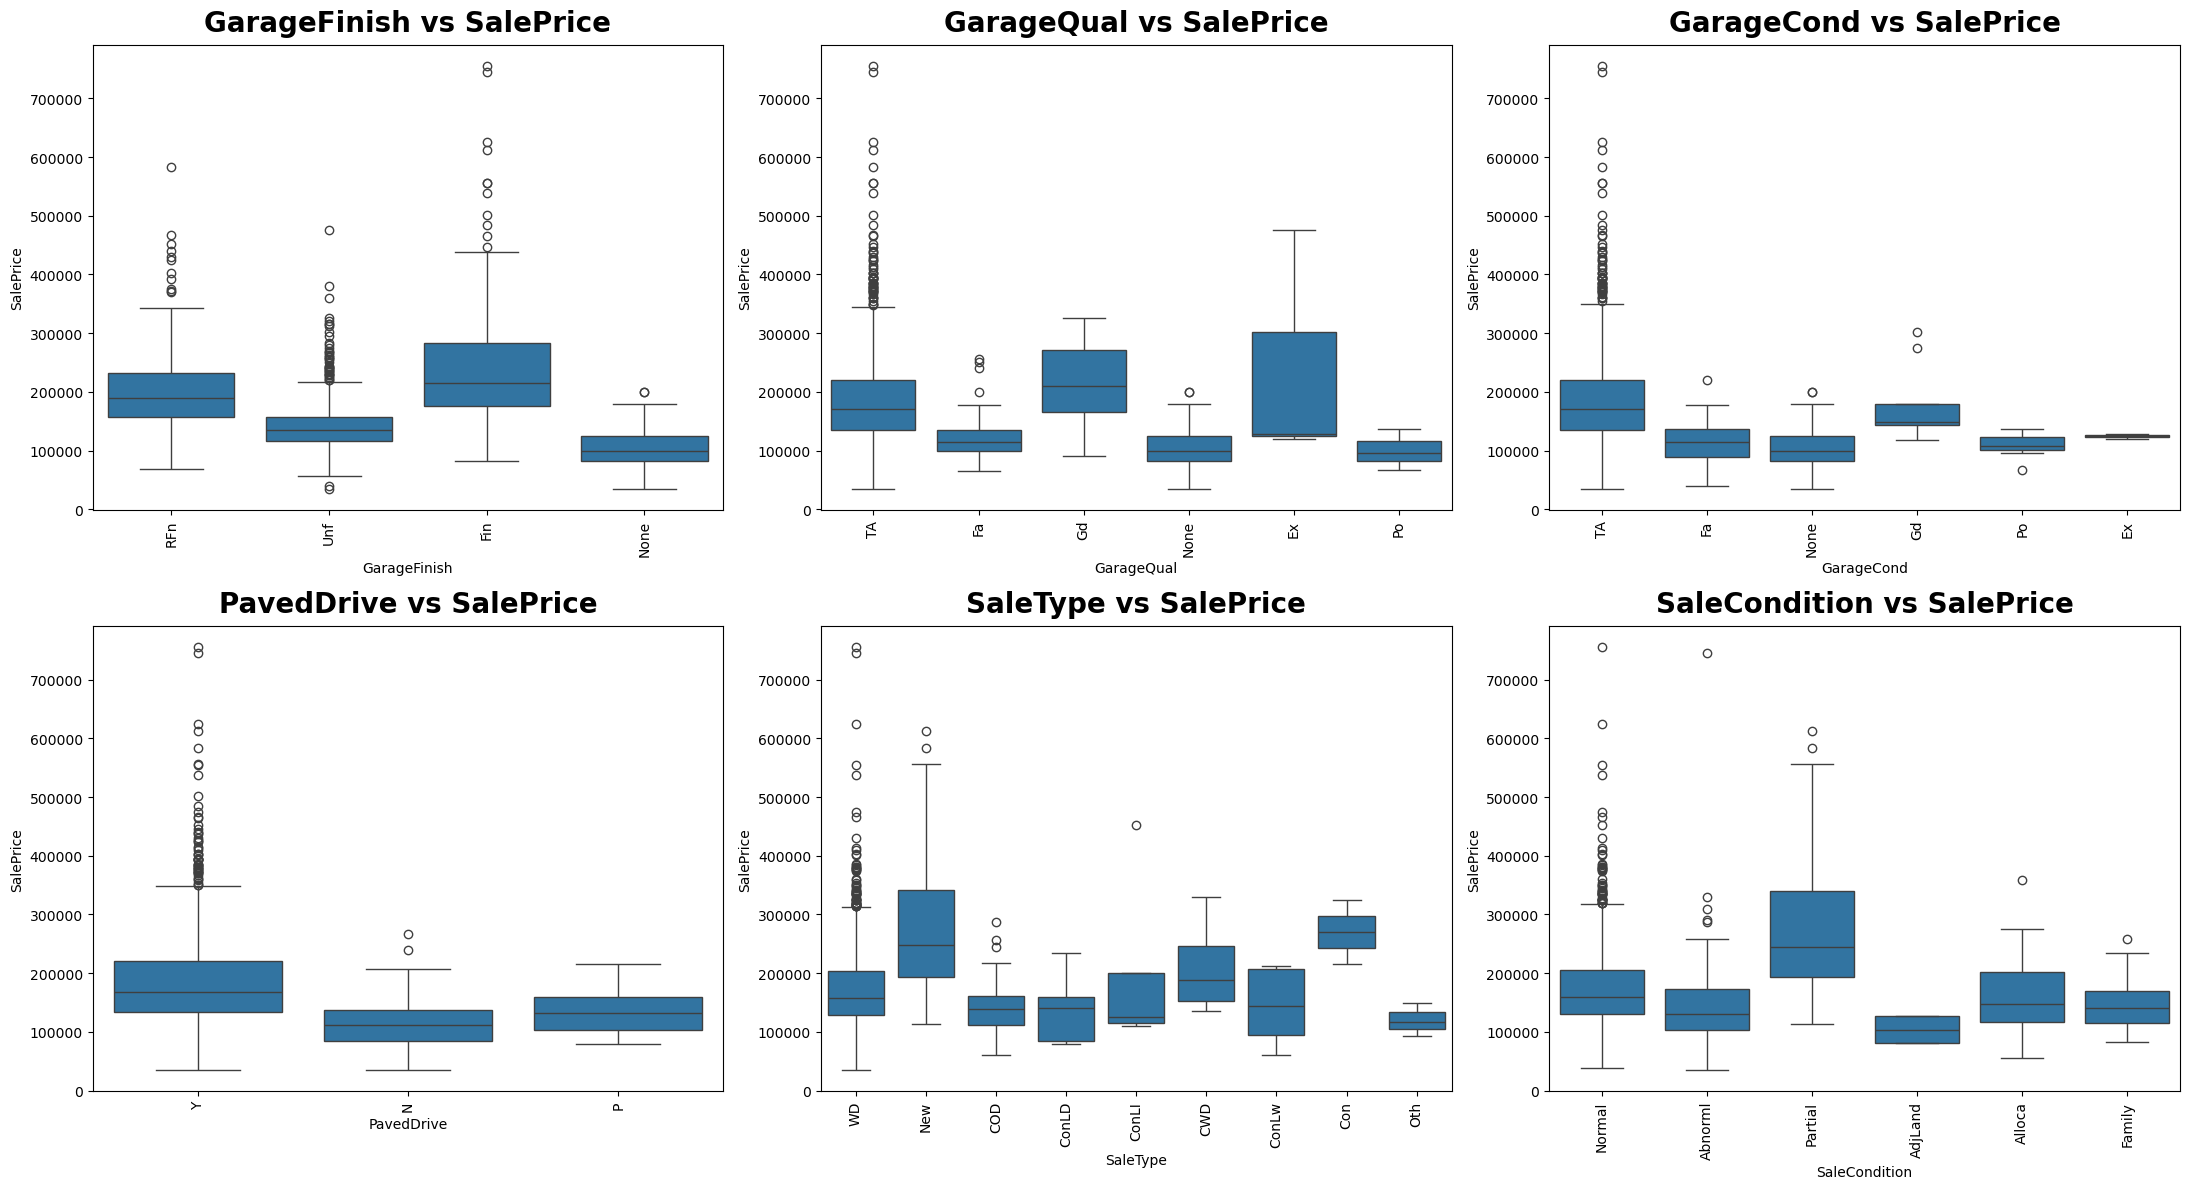

In [89]:
plt.figure(figsize=(22,12))
for index,column in enumerate(cat_cols[32:]):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=column, y="SalePrice", data=train_df)
    plt.title(f"{column} vs SalePrice",fontweight="black",pad=10,size=20)
    plt.xticks(rotation=90)
    plt.tight_layout()

📊 **Inference:**
- All the features in above **visualization** seems very useful for predicting the price of house.
- The only thing is that we have to perform enconding before model training.

### 7. Visualizing Discrete Numerical Features w.r.t Average "SalePrice".

In [92]:
dis_cols = ["OverallQual","OverallCond","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr",
            "KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","MoSold"]

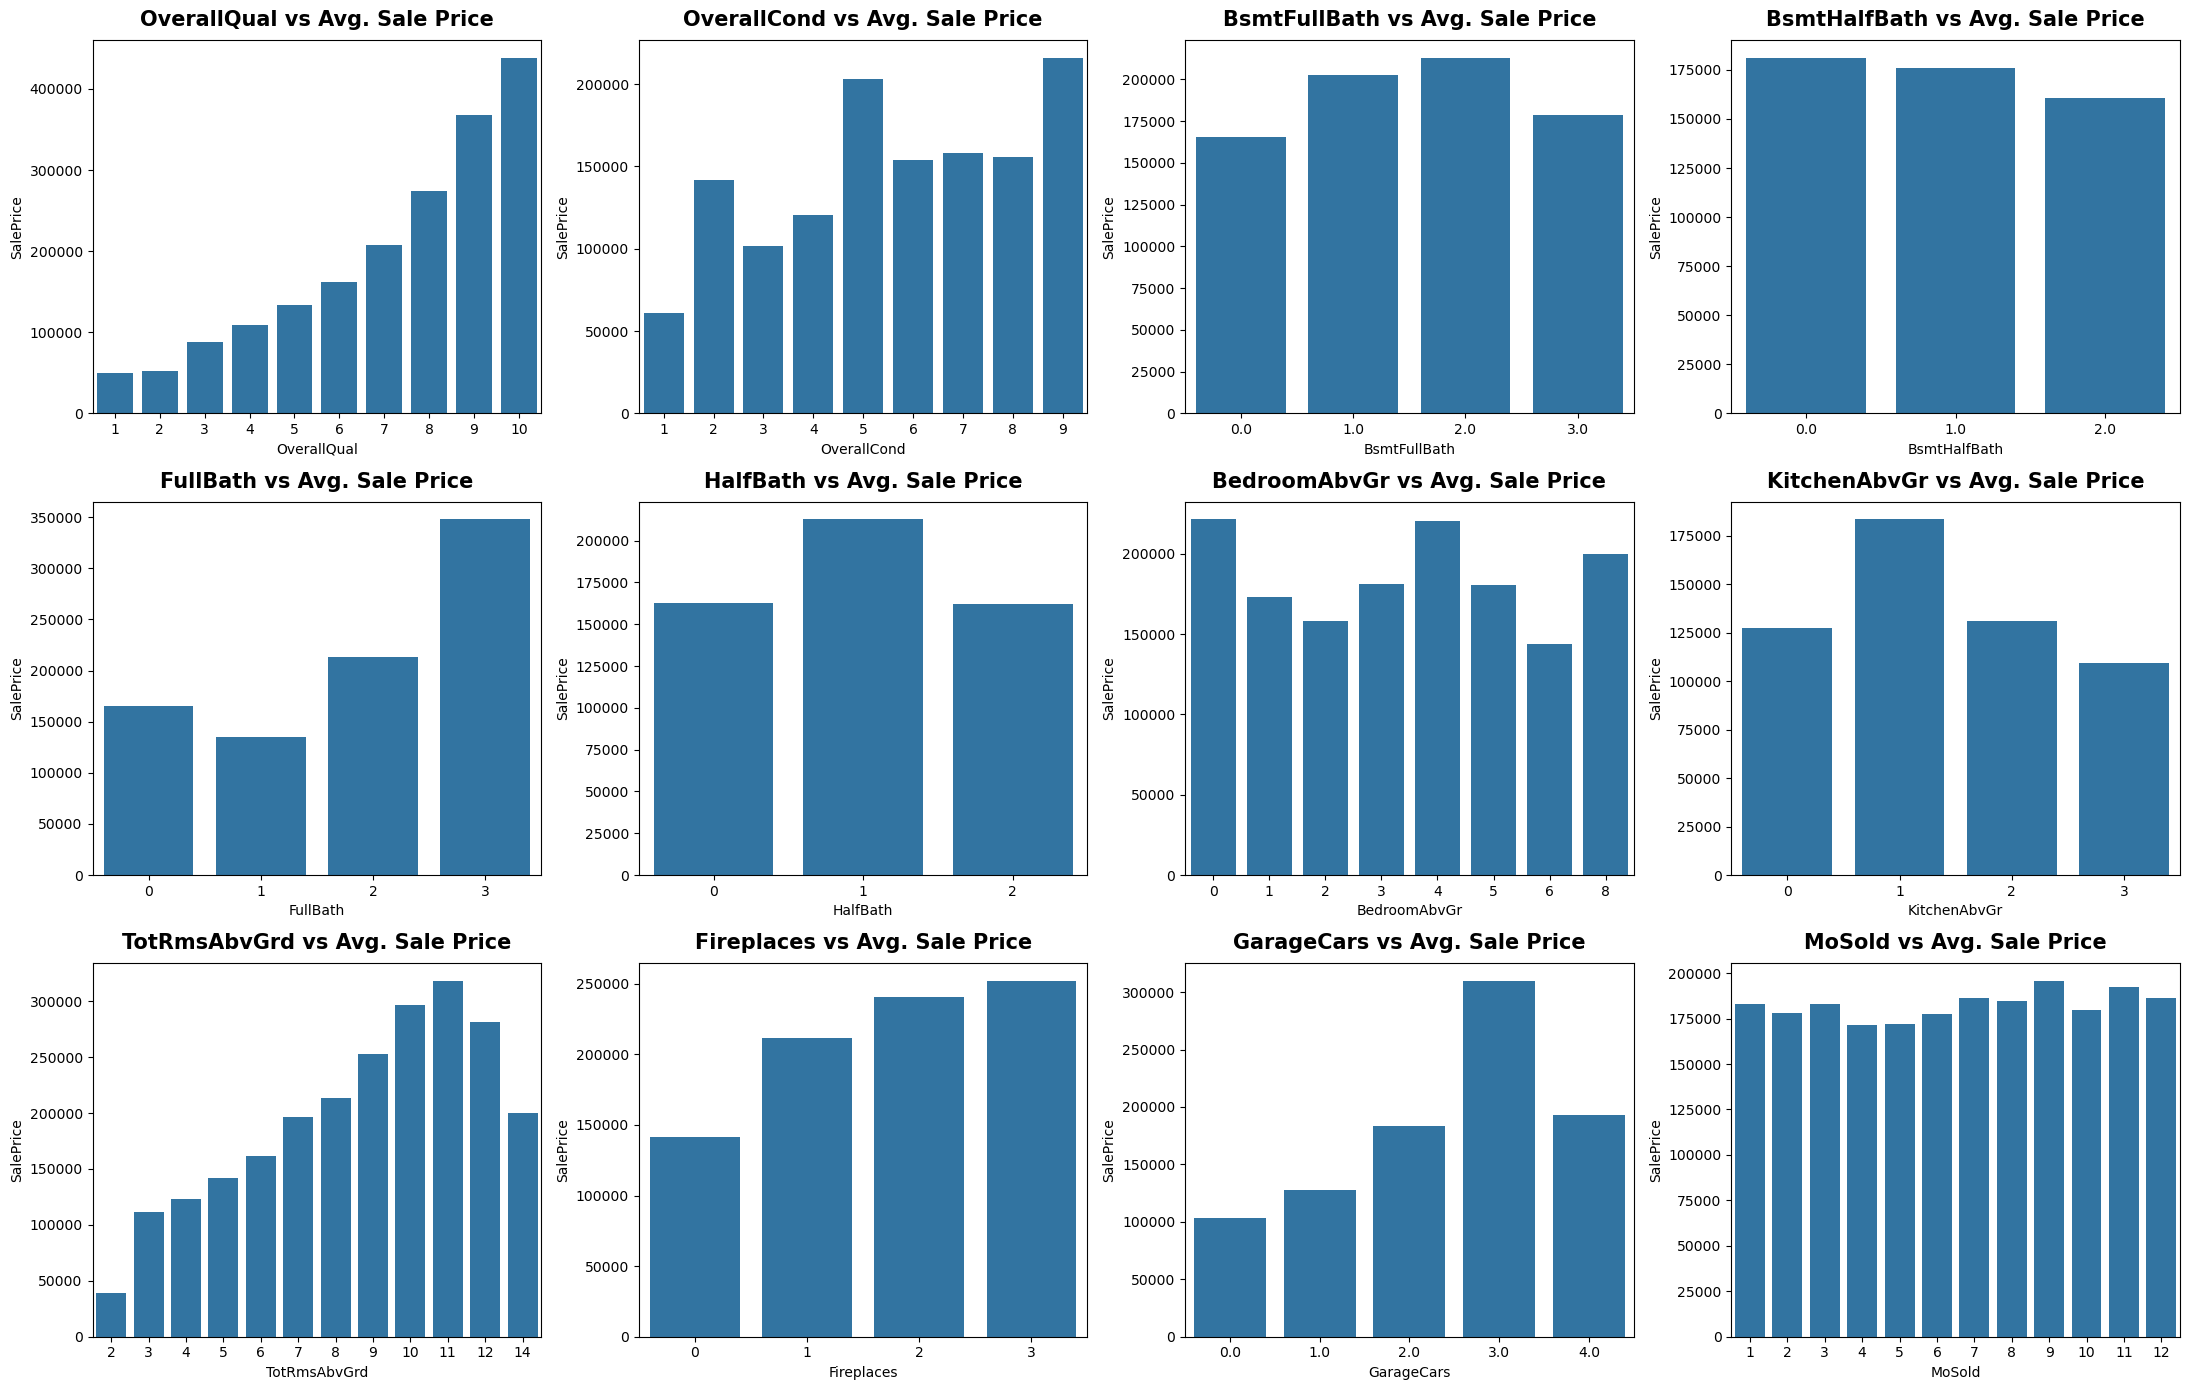

In [93]:
plt.figure(figsize=(22,14))
for index,column in enumerate(dis_cols):
    data = train_df.groupby(column)["SalePrice"].mean()
    plt.subplot(3,4,index+1)
    sns.barplot(x= data.index, y= data,)
    plt.title(f"{column} vs Avg. Sale Price",fontweight="black",size=15,pad=10)
    plt.tight_layout()

📊 **Inference:**
- **OverallQual,FullBath,TotRmsAbvGrd, FirePlaces and GarageCars** are having strong positive relation with the SalePrice.
- **KitchenAbvGr** is having a **negative correlation** with SalePrice.
- So all these above features seems useful for predicting Saleprice.

## Feature Engineering

### 1. Creating Two New Features "RenovationStatus" and "AgeAtSale" of the House.

- **YearBuilt:** It shows the Original construction date*
- **YrSold:** It shows the original Year Sold (YYYY)
- **YearRemodAdd:** It shows Remodel date (same as construction date if no remodeling or additions).

**Note:**
- First we can create a **binary feature** that indicates whether the house underwent **construction or not.**
- Second we can create a **Discrete numerical feature** that indicates the **age of house.**
- This features can provide valuable information about the **remodeling history** of the property and potentially impact the **sale price.**

In [98]:
train_df.loc[:, 'RenovationStatus'] = (train_df['YearBuilt'] != train_df['YearRemodAdd']).astype(int)
test_df.loc[:, 'RenovationStatus'] = (test_df['YearBuilt'] != test_df['YearRemodAdd']).astype(int)

C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\3161499929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.loc[:, 'RenovationStatus'] = (test_df['YearBuilt'] != test_df['YearRemodAdd']).astype(int)


In [99]:
train_df.loc[:, 'AgeAtSale'] = train_df['YrSold'] - train_df['YearBuilt']
test_df.loc[:, 'AgeAtSale'] = test_df['YrSold'] - test_df['YearBuilt']

C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\2481347718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.loc[:, 'AgeAtSale'] = test_df['YrSold'] - test_df['YearBuilt']


### Dropping the Unwanted Features.

In [101]:
train_df = train_df.loc[:, train_df.columns.difference(["YearBuilt", "YrSold", "YearRemodAdd"])]
test_df = test_df.loc[:, test_df.columns.difference(["YearBuilt", "YrSold", "YearRemodAdd"])]

### Visualizing the New Features Created.

C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\3414064685.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= data.index,y = data,palette="Set2")


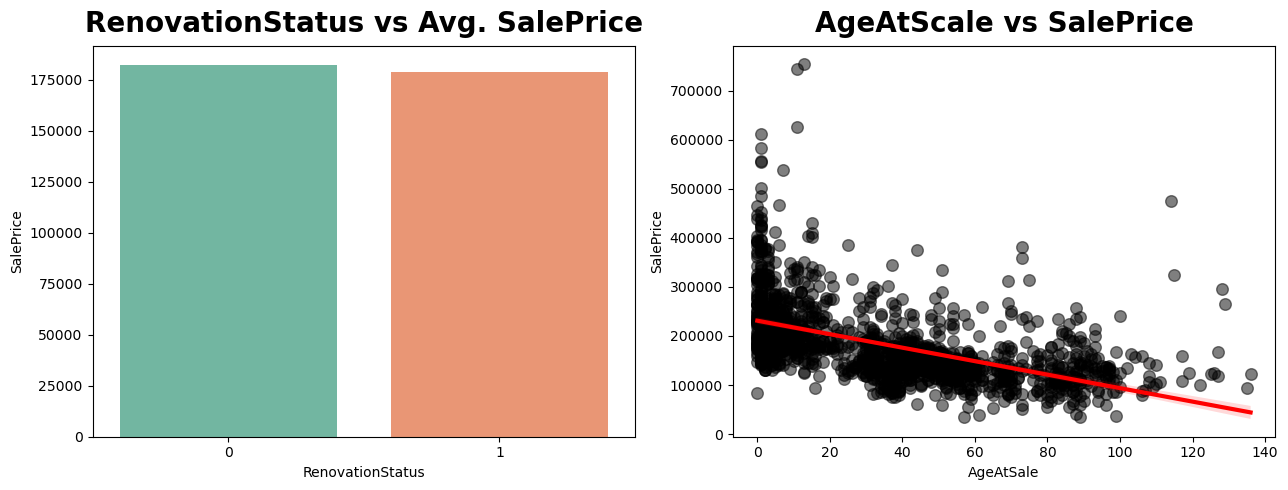

In [103]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
data=train_df.groupby("RenovationStatus")["SalePrice"].mean()
sns.barplot(x= data.index,y = data,palette="Set2")
plt.title("RenovationStatus vs Avg. SalePrice",pad=10,size=20,fontweight="black")
plt.subplot(1,2,2)
sns.regplot(x= train_df["AgeAtSale"],y= train_df["SalePrice"],color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
plt.title("AgeAtScale vs SalePrice",pad=10,size=20,fontweight="black")
plt.tight_layout()
plt.show()

📊 **Inference:**
- The SalePrice for both the **RenovationStatus cateegory** is approxiamately same.
- There is a negative correlation between **AgeAtScale & SalePrice.** So this new feature seems very useful for model training.

### 2. Creating a New Feature using all the columns storing "Bathroom Values.

- **FullBath:** It shows total no. of Full bathrooms above grade.
- **HalfBath:** It shows total no. of Half bathrooms above grade.
- **BsmtFullBath:** It shows total no. of Basement full bathrooms.
- **BsmtHalfBath:** It shows total no. of Basement half bathrooms.

Note:
- By adding all these feature values we can create a new feature **Total bathrooms.**

In [107]:
train_df["Total_Bathrooms"] = (train_df["FullBath"] + (0.5 * train_df["HalfBath"]) + 
                               train_df["BsmtFullBath"] + (0.5 * train_df["BsmtHalfBath"]))

In [108]:
test_df["Total_Bathrooms"] = (test_df["FullBath"] + (0.5 * test_df["HalfBath"]) + 
                               test_df["BsmtFullBath"] + (0.5 * test_df["BsmtHalfBath"]))

### Visualiing "Total_Bathrooms" w.r.t Average "SalePrice".

C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\2480774164.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= train_df["Total_Bathrooms"], y= train_df["SalePrice"], palette="Set2")
C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\2480774164.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= avg.index,y= avg,palette="Set2")


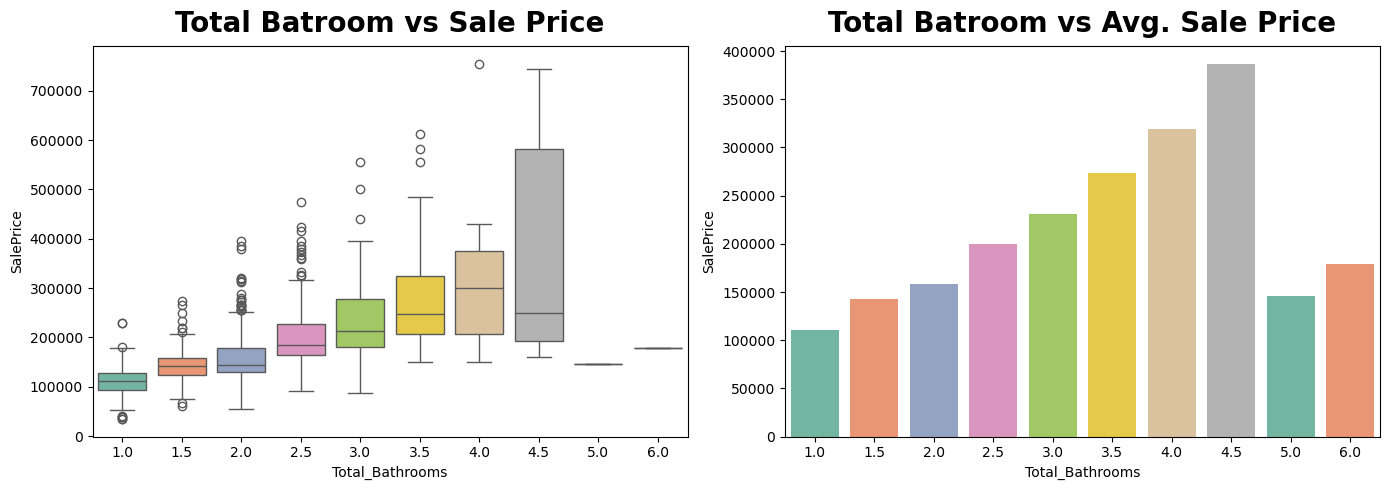

In [110]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(x= train_df["Total_Bathrooms"], y= train_df["SalePrice"], palette="Set2")
plt.title("Total Batroom vs Sale Price",fontweight="black",size=20,pad=10)

plt.subplot(1,2,2)
avg = train_df.groupby("Total_Bathrooms")["SalePrice"].mean()
sns.barplot(x= avg.index,y= avg,palette="Set2")
plt.title("Total Batroom vs Avg. Sale Price",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

📊 **Inference:**
- We can clearly observe a **strong positive** correlation between **Total Bathrooms and SalePrice.**
- There's a **class-imbalance** because there are only 1 record for Total Bathrooms 5 & 6.
- But still this feature seems important very important for predicting Saleprice.

### 3. Creating a New Feature using all the columns related to "porch".

- **WoodDeckSF:** Wood deck area in square feet.
- **OpenPorchSF:** Open porch area in square feet.
- **EnclosedPorch:** Enclosed porch area in square feet.
- **3SsnPorch:** Three season porch area in square feet.
- **ScreenPorch:** Screen porch area in square feet.
    
**Note:-**
A porch is a covered outdoor living space attached to a house, typically used for relaxation or socializing.
So we can create a new feature **Total_Porch_SF** to indicate the total porch Sqaure Feet available

In [114]:
train_df['Total_Porch_SF'] = (train_df['OpenPorchSF'] + train_df['3SsnPorch'] +train_df['EnclosedPorch'] +
                              train_df['ScreenPorch'] + train_df['WoodDeckSF'])

In [115]:
test_df['Total_Porch_SF'] = (test_df['OpenPorchSF'] + test_df['3SsnPorch'] +test_df['EnclosedPorch'] +
                              test_df['ScreenPorch'] + test_df['WoodDeckSF'])

### Visualizing All These Features.

C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\1052129626.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  corr = round(train_df[[column,"SalePrice"]].corr()["SalePrice"][0],2)
C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\1052129626.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  corr = round(train_df[[column,"SalePrice"]].corr()["SalePrice"][0],2)
C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\1052129626.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access 

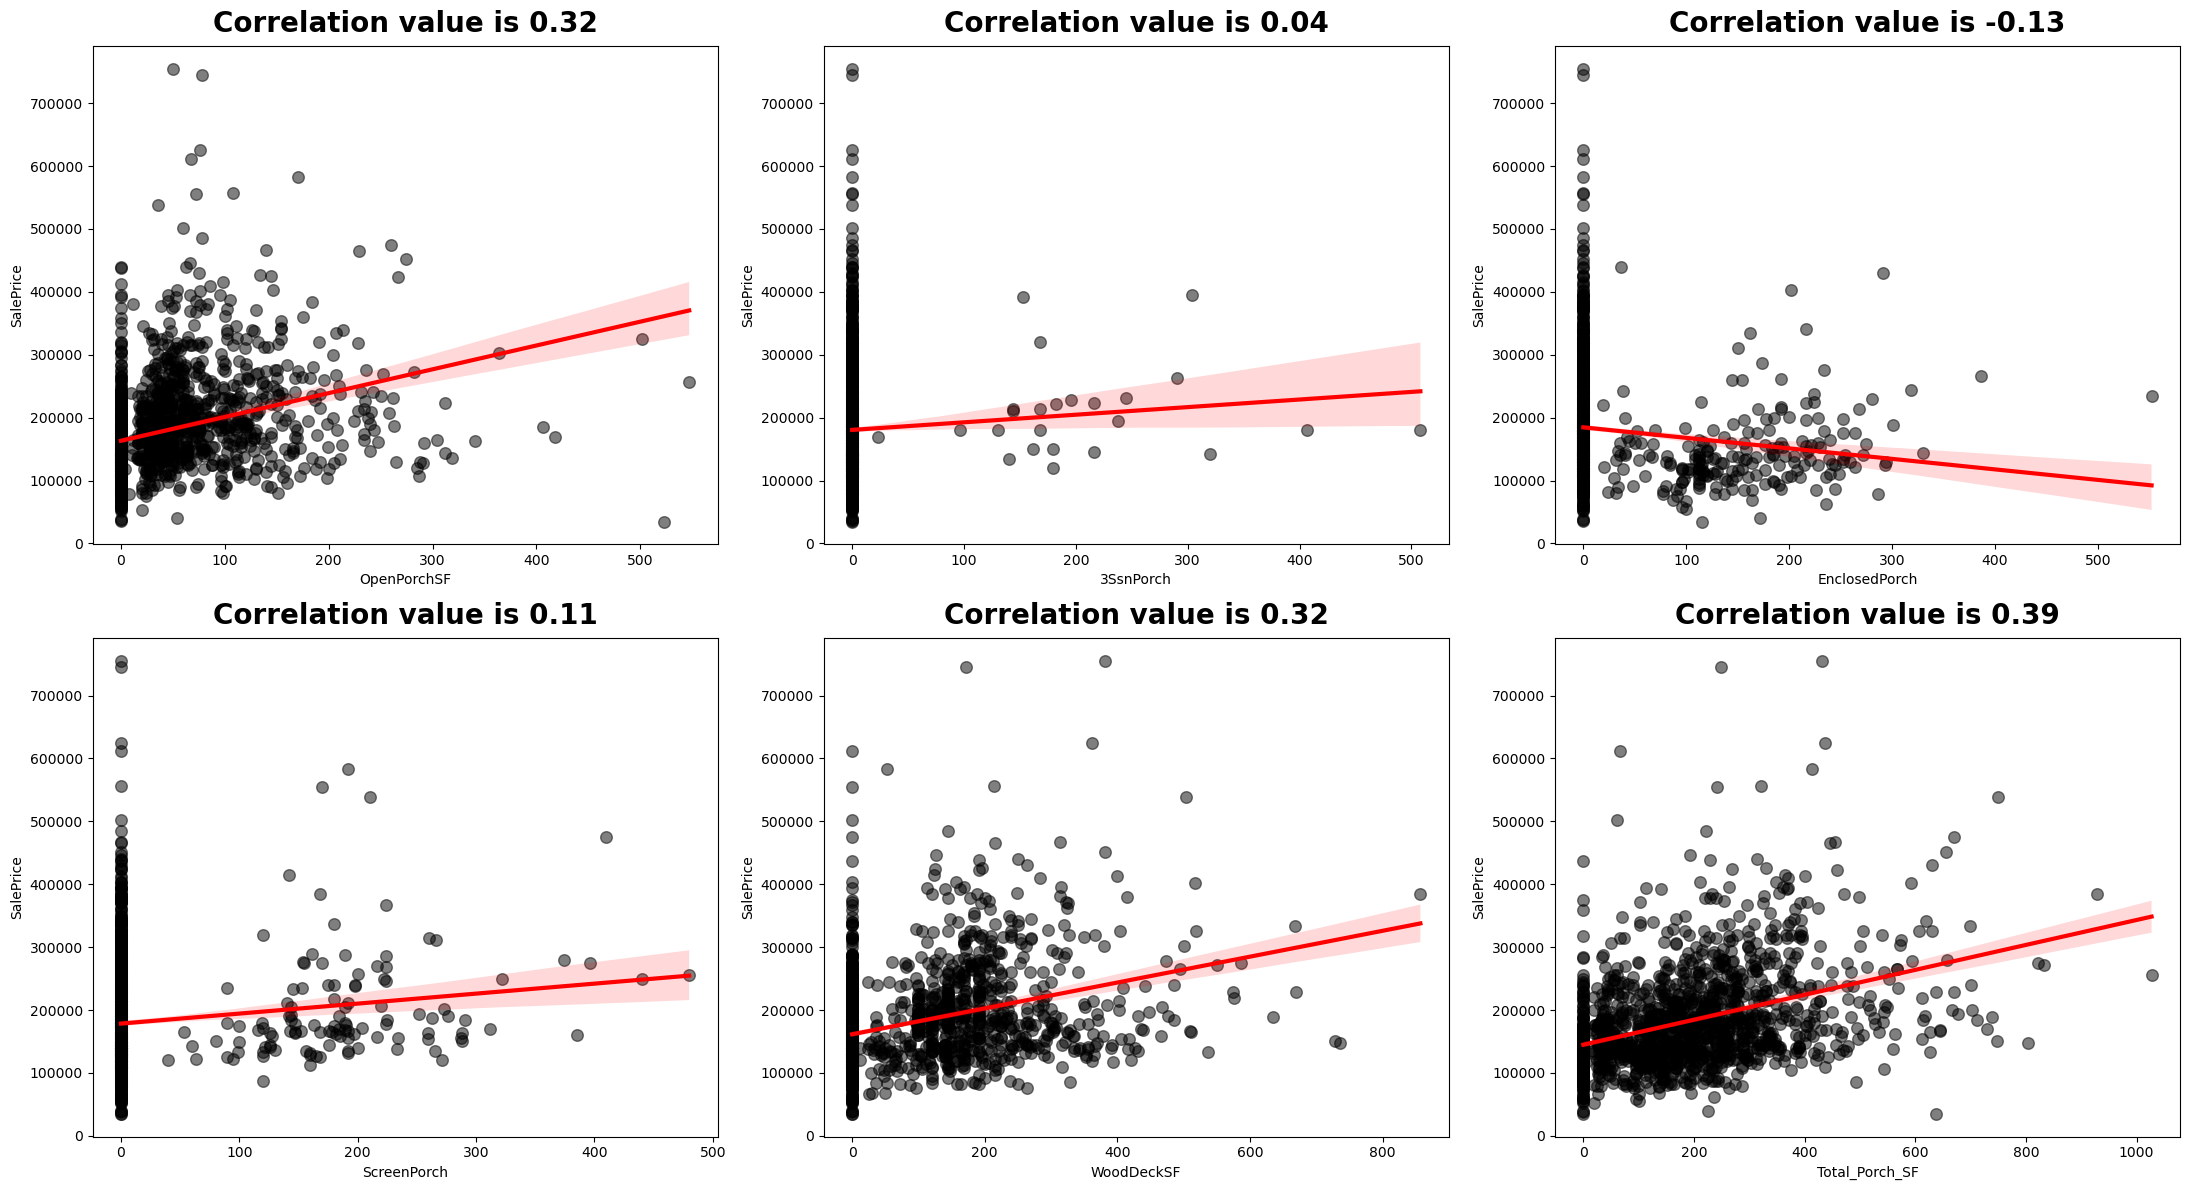

In [117]:
cols = ["OpenPorchSF","3SsnPorch","EnclosedPorch","ScreenPorch","WoodDeckSF","Total_Porch_SF"]

plt.figure(figsize=(22,12))
for index,column in enumerate(cols):
    plt.subplot(2,3,index+1)
    sns.regplot(x= train_df[column],y= train_df["SalePrice"],color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
    corr = round(train_df[[column,"SalePrice"]].corr()["SalePrice"][0],2)
    plt.title(f"Correlation value is {corr}",pad=10,size=20,fontweight="black")
    plt.tight_layout()

📊 **Inference:**
- Feature like **OpenPorchSF,WoodDeckSF and Total_Porch_SF** are having moderate correlation.So these are useful features.
- Feature like **3SsnPorch,EnclosedPorch, and ScreenPorch** are having weak correlation.So we can simply drop this features.

### Dropping Features with Weak Correlation.

In [120]:
cols = ["3SsnPorch","EnclosedPorch","ScreenPorch"]

train_df.drop(columns=cols,inplace=True)
test_df.drop(columns=cols,inplace=True)

### 4. Creating a New Feature Using "Sqaure Footage".

- **BsmtFinSF1:** Type 1 finished square feet.
- **BsmtFinSF2:** Type 2 finished square feet.
- **BsmtUnfSF:** Unfinished square feet of basement area.
- **TotalBsmtSF:** Total square feet of basement area.
- **1stFlrSF:** First Floor square feet.
- **2ndFlrSF:** Second floor square feet.
    
**Note:-**
By adding all these square footage values we can create a new feature **Total_sqr_footage.** indicating the total square footage of house

In [123]:
train_df['Total_sqr_footage']=(train_df['BsmtFinSF1']+train_df['BsmtFinSF2']+train_df['1stFlrSF']+train_df['2ndFlrSF'])
test_df['Total_sqr_footage'] =(test_df['BsmtFinSF1']+test_df['BsmtFinSF2']+test_df['1stFlrSF']+test_df['2ndFlrSF'])

### Visualizing All These Features.

C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\3064289973.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  corr = round(train_df[[column,"SalePrice"]].corr()["SalePrice"][0],2)
C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\3064289973.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  corr = round(train_df[[column,"SalePrice"]].corr()["SalePrice"][0],2)
C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\3064289973.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access 

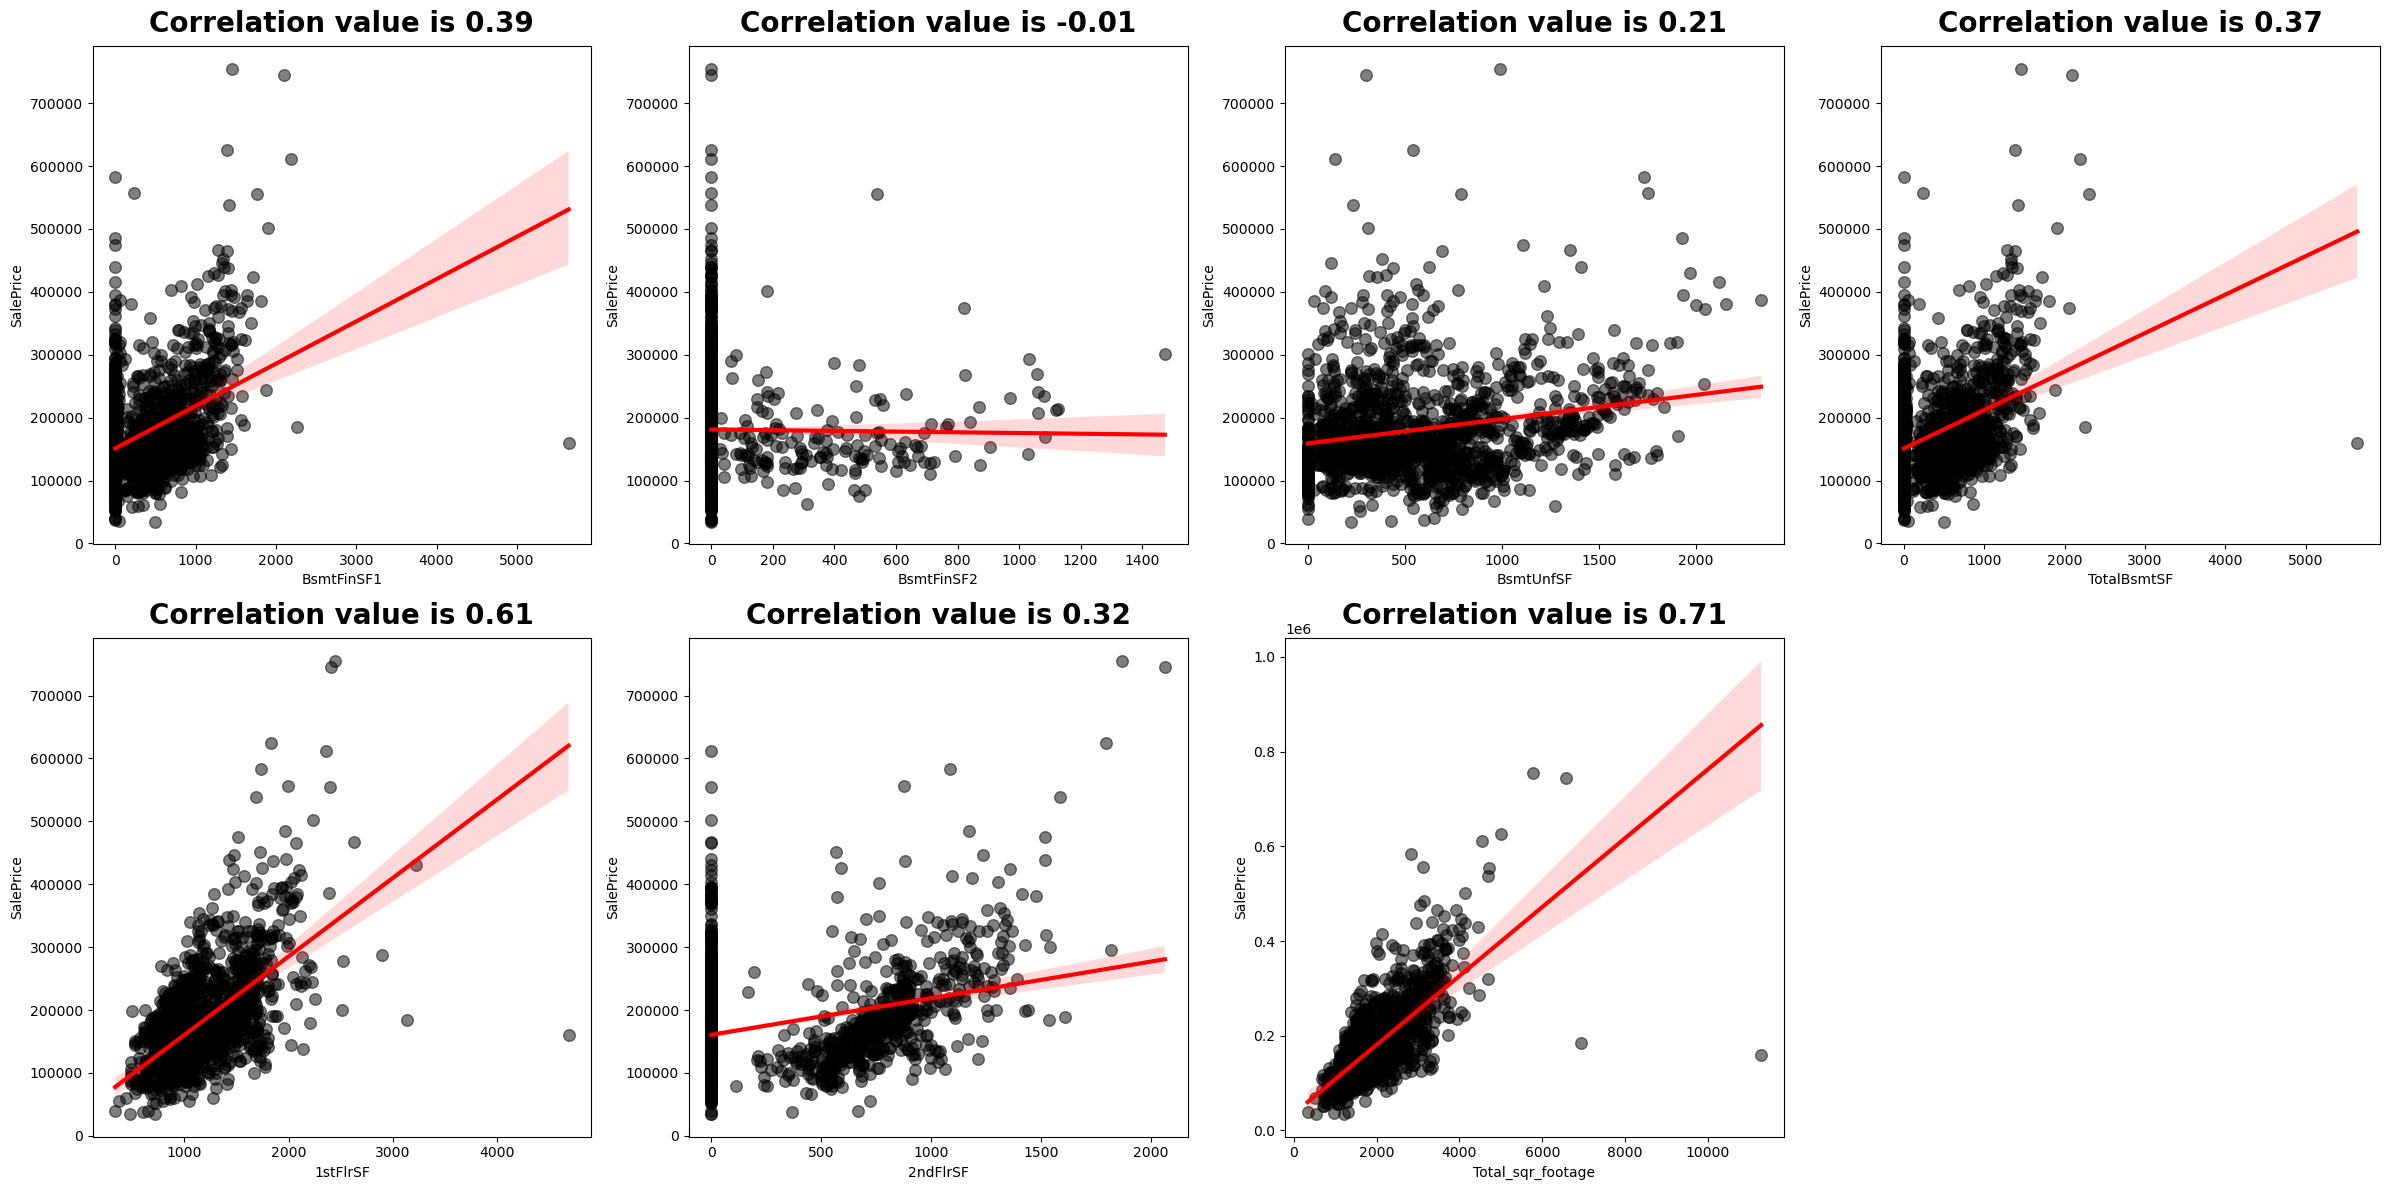

In [125]:
cols = ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","Total_sqr_footage"]

plt.figure(figsize=(24,12))
for index,column in enumerate(cols):
    plt.subplot(2,4,index+1)
    sns.regplot(x= train_df[column],y= train_df["SalePrice"],color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
    corr = round(train_df[[column,"SalePrice"]].corr()["SalePrice"][0],2)
    plt.title(f"Correlation value is {corr}",pad=10,size=20,fontweight="black")
    plt.tight_layout()

**Inference:**
- The new feature **Total_sqr_footage and 1stFlrSF** are having very **high correlation** with the target varibale.
- Features like **BsmtFinSF1,TotalBsmtSF, and 2ndFlrSF** are having **modearte correlation** with the target variable.
- Features like **BsmtFinSF2 and BsmtUnfSF** are having very **weak correaltion** witht the target variable. So we can simply drop those featues

### Dropping Features with weak correaltion.

In [128]:
cols = ["BsmtFinSF2","BsmtUnfSF"]
train_df.drop(columns=cols,inplace=True)
test_df.drop(columns=cols,inplace=True)

### 5. Creatining a New Feature using "Condition1" & "Condition2".

- **Condition1:** Proximity to various conditions.
- **Condition2:** Proximity to various conditions (if more than one is present).
    
**Note:-**
- In the EDA section we found that **Condition2**feature wah having **class-imbalace.**
- Instead of keeping two different conditions we can combine both **condition1 and condition2.**
- After Combining we can create a new boolean feature **ProximityStatus** indicating No if its Norm or else Yes if there's any proximity.

In [131]:
def condition(df):
    df["Condition2"] = df["Condition2"].replace({"Norm":""}) #Norm means normal which indicates there's no second condition
    combined_condition = []
    for val1,val2 in zip(df["Condition1"],df["Condition2"]):
        if val2 == "":
            combined_condition.append(val1)
        elif val1==val2:
            combined_condition.append(val1)
        else:
            combined_condition.append(val1+val2)
            
    df["Combined_Condition"] = combined_condition
    df["ProximityStatus"] = (df["Combined_Condition"] == "Norm").astype(int)

In [132]:
condition(train_df)
condition(test_df)

### Dropping Columns Which are not Required Anymore.

In [134]:
train_df.drop(columns=["Condition1","Condition2","Combined_Condition"],inplace=True)
test_df.drop(columns=["Condition1","Condition2","Combined_Condition"],inplace=True)

### 6. Creating New Feature using "Heating" Feature.

- **Heating:** Type of heating.
- **HeatingQC:** Heating quality and condition.
    
**Note:**
- While performing EDA we found huge **class-imbalance** in Heating Feature.
- To reduce class-imbalance we can create a new feature by concatenating both the features.

In [137]:
train_df["HeatingQuality"] = train_df["Heating"] + "-" + train_df["HeatingQC"]
test_df["HeatingQuality"] = test_df["Heating"] + "-" + test_df["HeatingQC"]

### Dropping Features which are not required anymore.

In [139]:
train_df.drop(columns=["Heating","HeatingQC"],inplace=True)
test_df.drop(columns=["Heating","HeatingQC"],inplace=True)

In [140]:
test_df["HeatingQuality"].replace({"Wall-Po":"Wall-TA"},inplace=True)

C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\1386767686.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df["HeatingQuality"].replace({"Wall-Po":"Wall-TA"},inplace=True)


### 7. Creating Some New Boolean Features.

In [142]:
def boolean_feature(df):
    df["Has2ndFloor"] = (df['2ndFlrSF'] != 0).astype(int)
    df["HasGarage"]  = (df["GarageArea"] !=0).astype(int)
    df["HasBsmt"]    = (df["TotalBsmtSF"]!=0).astype(int)
    df["HasFirePlace"] = (df["Fireplaces"]!=0).astype(int) 

In [143]:
boolean_feature(train_df)
boolean_feature(test_df)

### Visualizing All These New Boolean Features.

C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\811889698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y="SalePrice", data=train_df, palette="Set2")
C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\811889698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y="SalePrice", data=train_df, palette="Set2")
C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\811889698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column, y="SalePrice", data=train_df, palette="Set2")
C:\Users\Casey\AppData\Local\Temp\ipykernel

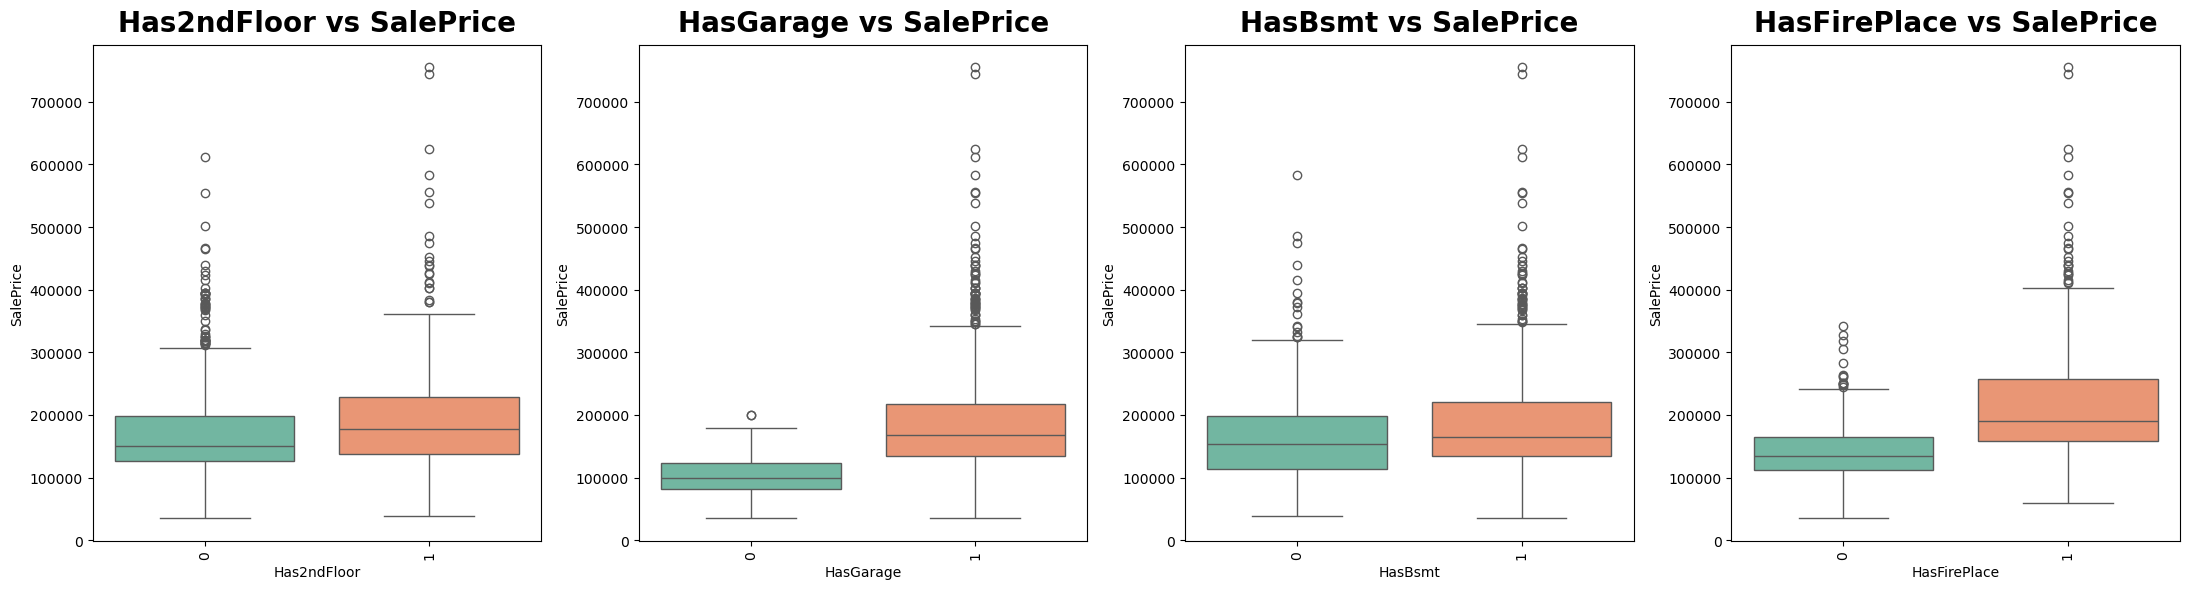

In [145]:
plt.figure(figsize=(22,6))
for index,column in enumerate(["Has2ndFloor","HasGarage","HasBsmt","HasFirePlace"]):
    plt.subplot(1,4,index+1)
    sns.boxplot(x=column, y="SalePrice", data=train_df, palette="Set2")
    plt.title(f"{column} vs SalePrice",fontweight="black",pad=10,size=20)
    plt.xticks(rotation=90)
    plt.tight_layout()

📊 **Inference:**
- All these features seems very useful for model training.

## Data Preprocessing: Part 2

In [148]:
### 1. Performing Log Transformation on Target variable.

In [149]:
z = train_df["SalePrice"]

train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

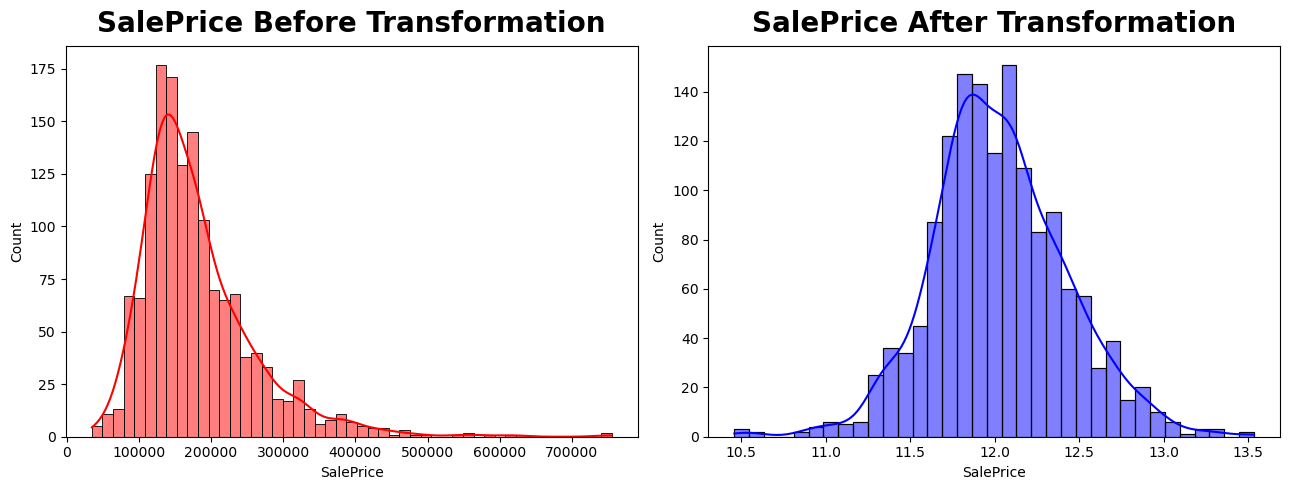

In [150]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.histplot(z,color="red",kde=True)
plt.title("SalePrice Before Transformation",size=20,pad=10,fontweight="black")

plt.subplot(1,2,2)
sns.histplot(train_df["SalePrice"],color="blue",kde=True)
plt.title("SalePrice After Transformation",size=20,pad=10,fontweight="black")
plt.tight_layout()
plt.show()

📊 **Inference:**
- We can clearly onserve that SalePrice has been transformed to a **normal distribution.**
- This will help model in **Homoscedasticity,Interpretability and Model Performance.**

### 2. Applying Box-Cox Transformation on Continous Numerical Features to Reduce Skewness.

In [153]:
con_cols = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF",
            "GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","PoolArea","MiscVal","AgeAtSale","Total_Porch_SF",
            "Total_sqr_footage"]

In [154]:
train_df[con_cols].skew().sort_values().to_frame().rename(columns={0:"Skewness"}).T

GarageArea  AgeAtSale  2ndFlrSF  Total_Porch_SF  GrLivArea  \
Skewness    0.179981    0.60903   0.81303        1.102313    1.36656   

          1stFlrSF  TotalBsmtSF  WoodDeckSF  BsmtFinSF1  Total_sqr_footage  \
Skewness  1.376757     1.405961    1.541376    1.685503           2.163968   

          LotFrontage  OpenPorchSF  MasVnrArea  LowQualFinSF    LotArea  \
Skewness     2.213556     2.364342    2.677616      9.011341  12.207688   

           PoolArea    MiscVal  
Skewness  14.828374  24.476794

In [233]:
for feature in con_cols:
    if train_df[feature].nunique() <= 1:  # Proceed only if not constant
        norm_max = boxcox_normmax(train_df[feature] + 1)
        train_df[feature] = boxcox1p(train_df[feature], norm_max)
        test_df[feature] = boxcox1p(test_df[feature] + 1, norm_max)

In [235]:
train_df[con_cols].skew().sort_values().to_frame().rename(columns={0:"Skewness"})

Skewness
LotFrontage         0.005408
GarageArea          0.179981
AgeAtSale           0.609030
2ndFlrSF            0.813030
Total_Porch_SF      1.102313
GrLivArea           1.366560
1stFlrSF            1.376757
TotalBsmtSF         1.405961
WoodDeckSF          1.541376
BsmtFinSF1          1.685503
Total_sqr_footage   2.163968
OpenPorchSF         2.364342
MasVnrArea          2.677616
LowQualFinSF        9.011341
LotArea            12.207688
PoolArea           14.828374
MiscVal            24.476794

### 3. Dropping Features with High Skewness Values.

In [238]:
cols = ["MiscVal","LowQualFinSF","PoolArea"]

train_df.drop(columns=cols, inplace=True)
test_df.drop(columns=cols, inplace=True)

### 4. Performing Target Encoding on Categorical Features with High Cardinality.

In [241]:
cols = ["Neighborhood","Exterior1st","Exterior2nd","HeatingQuality"]
for column in cols:
    data = train_df.groupby(column)["SalePrice"].mean()
    for value in data.index:
        train_df[column] = train_df[column].replace({value:data[value]})
        test_df[column] = test_df[column].replace({value:data[value]})

C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\403915686.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df[column] = train_df[column].replace({value:data[value]})
C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\403915686.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df[column] = test_df[column].replace({value:data[value]})
C:\Users\Casey\AppData\Local\Temp\ipykernel_11828\403915686.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the 

### 5. Performing Label Encoding on Other Features.

In [244]:
cols = ["HouseStyle","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","Electrical","KitchenQual",
        "GarageQual","GarageCond"]

In [246]:
encoder = LabelEncoder()

train_df[cols] = train_df[cols].apply(encoder.fit_transform)
test_df[cols] = test_df[cols].apply(encoder.fit_transform)

### 6. Applying One-Hot Encoding on Nominal Categorical Columns.

In [249]:
cols = train_df.select_dtypes(include="object").columns

In [251]:
train_df = pd.get_dummies(train_df, columns=cols)
test_df = pd.get_dummies(test_df,columns=cols)

In [253]:
train_df.shape

(1460, 143)

In [255]:
test_df.shape

(1459, 142)

### 7. Segregating Features and Labels For Model Training.

In [258]:
X = train_df.drop(columns=["SalePrice"])
y = train_df["SalePrice"]

### 8. Feature Scaling using RobustScaler.

In [261]:
scaler =RobustScaler()

In [263]:
X_scaled = scaler.fit_transform(X)
test_df = scaler.fit_transform(test_df)

### 9. Splitting Data For Model Training & Testing.

In [266]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=0)

In [268]:
print("Dimension of x_train:=>",x_train.shape)
print("Dimension of x_test:=>",x_test.shape)
print("Dimension of y_train:=>",y_train.shape)
print("Dimension of y_test:=>",y_test.shape)

Dimension of x_train:=> (1168, 142)
Dimension of x_test:=> (292, 142)
Dimension of y_train:=> (1168,)
Dimension of y_test:=> (292,)


## Model Creation & Evaluation

### Creating a Function to Train Model using Different Regression Algorithms.

In [274]:
r2_value = []
adjusted_r2_value = []
mae_value = []
mse_value = []
rmse_value = []

In [276]:
def model_evaluation(model):
    model.fit(x_train, y_train)
    y_train_pred= model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #Metrics Calculation.
    mae = mean_absolute_error(y_test,y_test_pred)
    mse = mean_squared_error(y_test,y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_test_pred)
    adjusted_r2 = 1 - ((1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
   
    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)
    r2_value.append(r2)
    adjusted_r2_value.append(adjusted_r2) 
    
    print(f"R2 Score of the {model} model is=>",r2)
    print(f"Adjusted R2 Score of the {model} model is=>",adjusted_r2)
    print()
    print(f"MAE of {model} model is=>",mae)
    print(f"MSE of {model} model is=>",mse)
    print(f"RMSE of {model} model is=>",rmse)
    

    # Scatter plot.
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)    
    plt.scatter(y_train, y_train_pred, color='blue', label='Train')
    plt.scatter(y_test, y_test_pred, color='red', label='Test')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.title('Scatter Plot',fontweight="black",size=20,pad=10)
    
    # Residual plot.
    plt.subplot(1,2,2)
    plt.scatter(y_train_pred, y_train_pred - y_train, color='blue', label='Train')
    plt.scatter(y_test_pred, y_test_pred - y_test, color='red', label='Test')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend()
    plt.title('Residual Plot',fontweight="black",size=20,pad=10)
    plt.show()

### 1. Creating Linear Regression Model.

R2 Score of the LinearRegression() model is=> 0.7916207745637321
Adjusted R2 Score of the LinearRegression() model is=> 0.5930311771680943

MAE of LinearRegression() model is=> 0.09529807215973725
MSE of LinearRegression() model is=> 0.03154821192048593
RMSE of LinearRegression() model is=> 0.17761816326177324


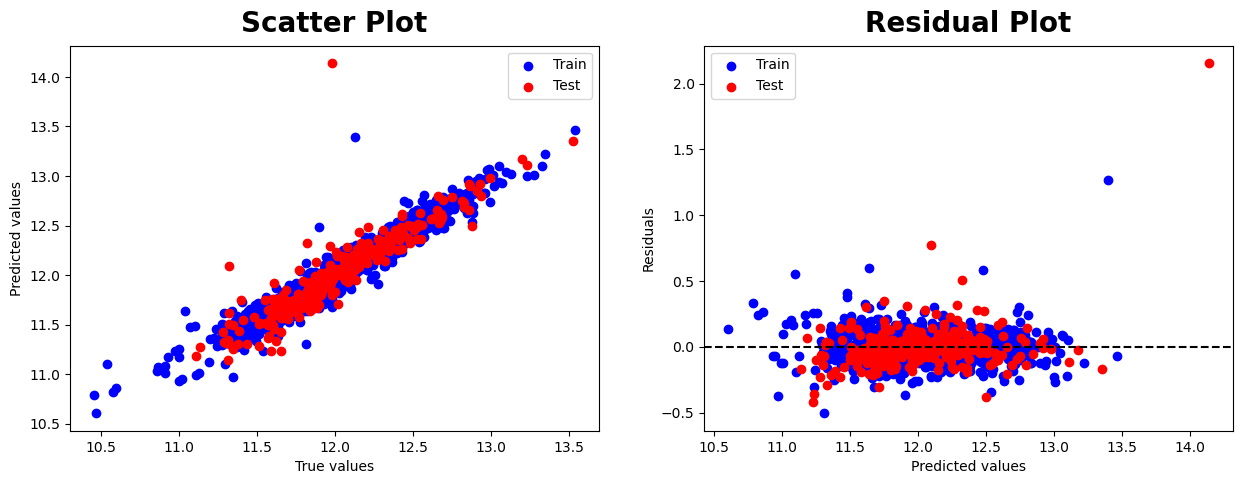

In [279]:
model_evaluation(LinearRegression())

### 2. Creating Support vector Regressor Model.

R2 Score of the SVR() model is=> 0.8837702555810703
Adjusted R2 Score of the SVR() model is=> 0.7730009689536338

MAE of SVR() model is=> 0.09394221854939738
MSE of SVR() model is=> 0.01759695862538756
RMSE of SVR() model is=> 0.13265352850711346


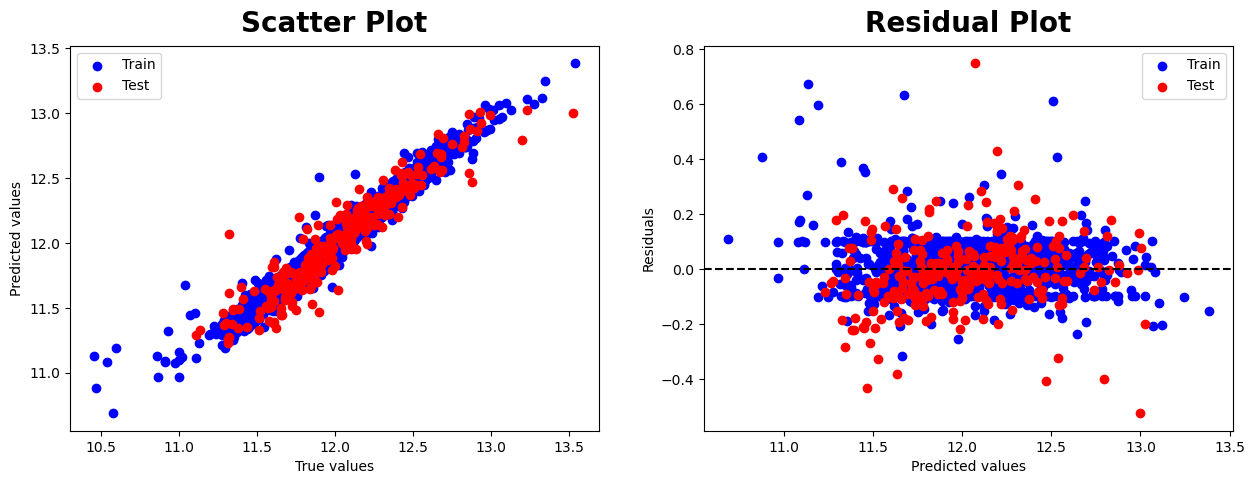

In [282]:
model_evaluation(SVR())

### 3. Creating Random Forest Regressor Model.

R2 Score of the RandomForestRegressor() model is=> 0.8673697022626492
Adjusted R2 Score of the RandomForestRegressor() model is=> 0.7409703581102747

MAE of RandomForestRegressor() model is=> 0.09918052767215108
MSE of RandomForestRegressor() model is=> 0.020079970694462664
RMSE of RandomForestRegressor() model is=> 0.14170381326719003


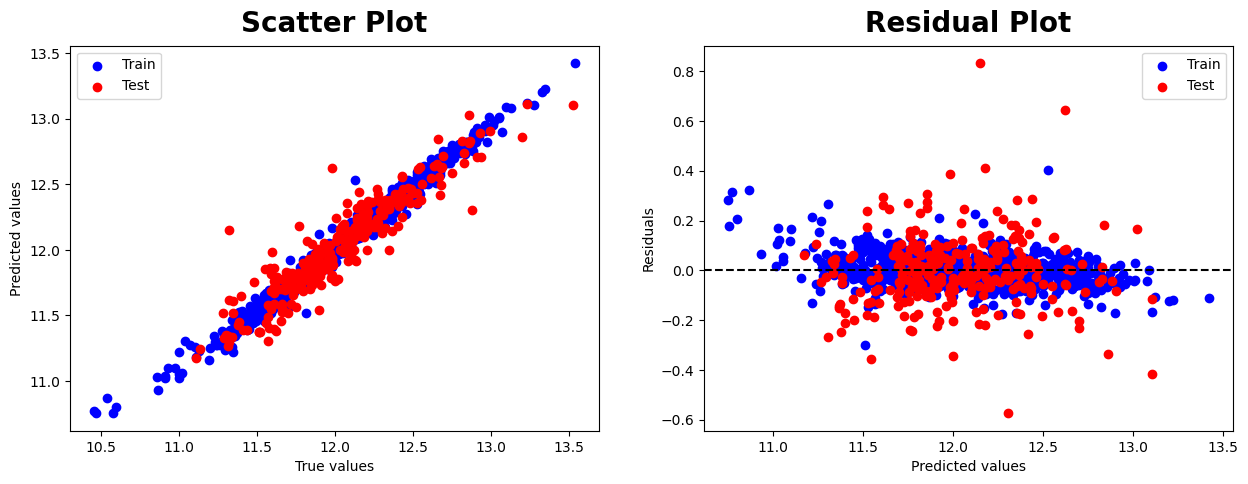

In [285]:
model_evaluation(RandomForestRegressor())

### 4. Creating AdaBoost Regressor Model.

R2 Score of the AdaBoostRegressor() model is=> 0.8102599463213066
Adjusted R2 Score of the AdaBoostRegressor() model is=> 0.6294338548959746

MAE of AdaBoostRegressor() model is=> 0.12774816820980156
MSE of AdaBoostRegressor() model is=> 0.028726277347117708
RMSE of AdaBoostRegressor() model is=> 0.16948828085480633


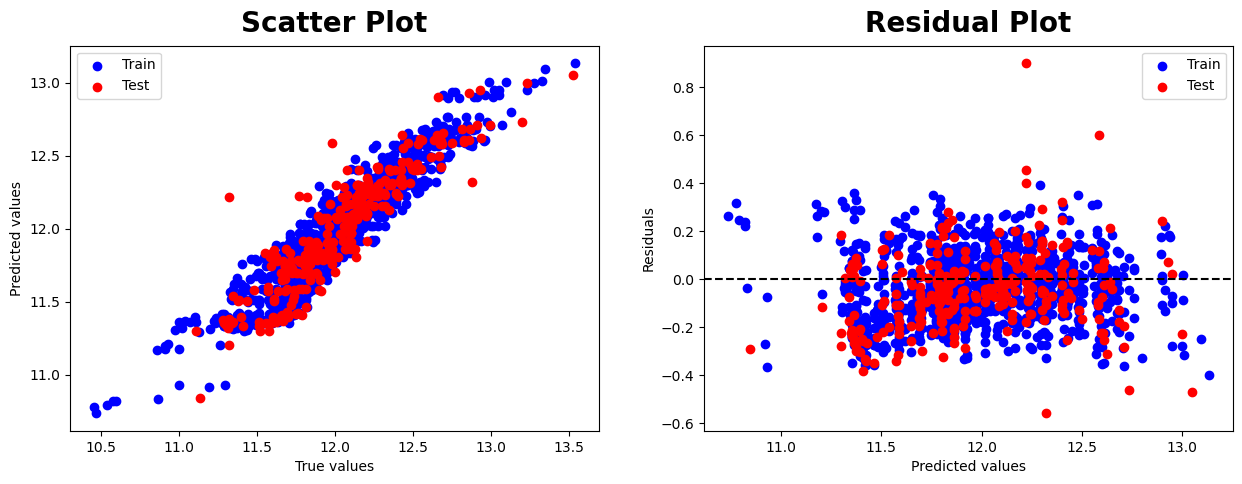

In [288]:
model_evaluation(AdaBoostRegressor())

### 5. Creating Gradient Boosting Regressor Model.

R2 Score of the GradientBoostingRegressor() model is=> 0.8785977355748281
Adjusted R2 Score of the GradientBoostingRegressor() model is=> 0.7628989332367448

MAE of GradientBoostingRegressor() model is=> 0.09686677249294108
MSE of GradientBoostingRegressor() model is=> 0.018380068155515784
RMSE of GradientBoostingRegressor() model is=> 0.13557311000163633


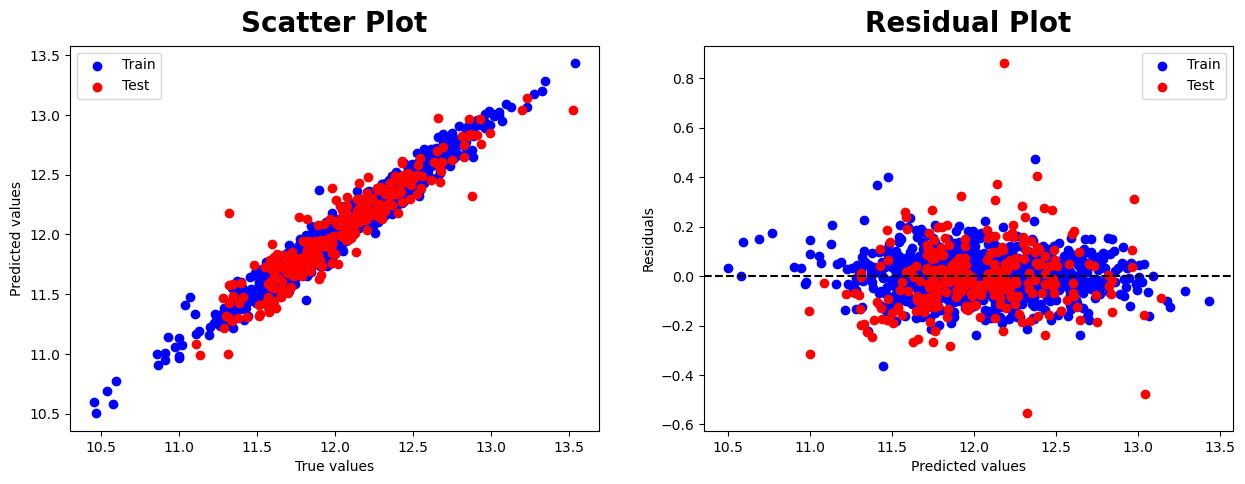

In [291]:
model_evaluation(GradientBoostingRegressor())

### 6. Creating LGBM Regressor Model.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3197
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 111
[LightGBM] [Info] Start training from score 12.023362
R2 Score of the LGBMRegressor() model is=> 0.8755004082234018
Adjusted R2 Score of the LGBMRegressor() model is=> 0.7568497905571135

MAE of LGBMRegressor() model is=> 0.09746147807586945
MSE of LGBMRegressor() model is=> 0.018848997529186964
RMSE of LGBMRegressor() model is=> 0.137291651345546


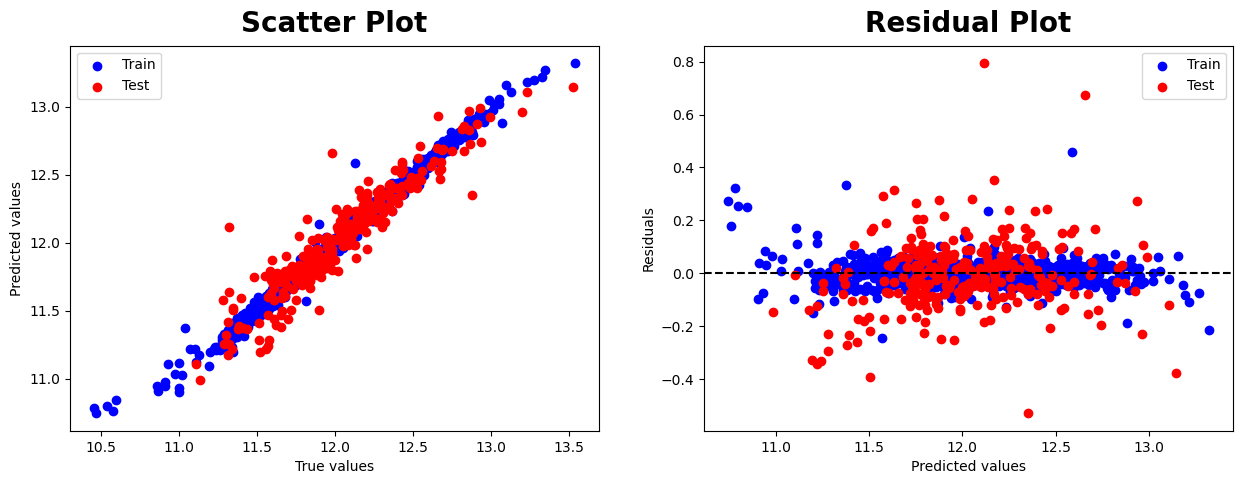

In [294]:
model_evaluation(LGBMRegressor())

### 7. Creating XGBRegressor Model.

R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model is=> 0.8790615087364635
Adjusted R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stoppin

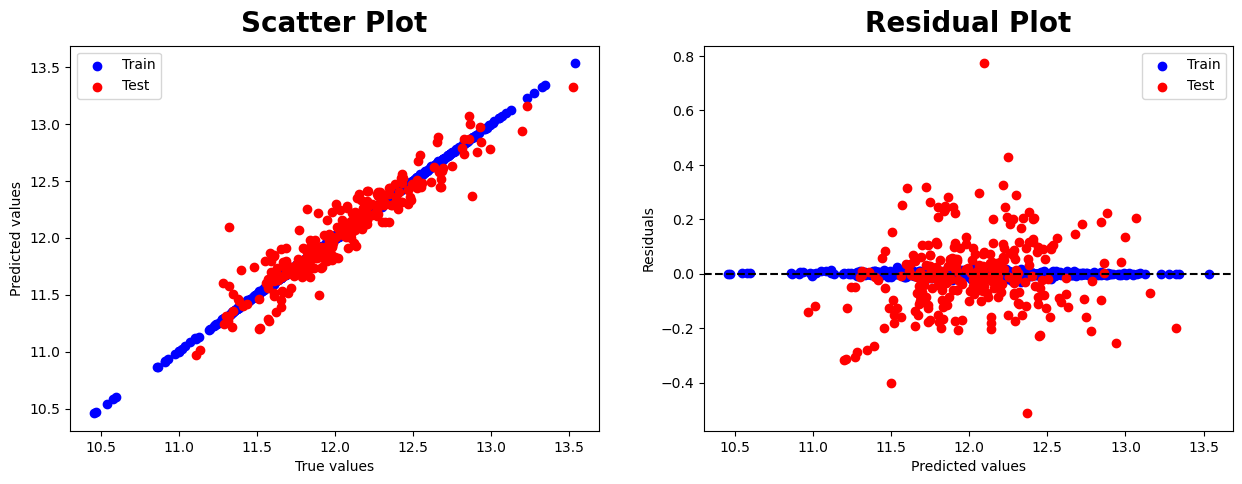

In [297]:
model_evaluation(XGBRegressor())

### 8. Creating CatBoost Regressor Model.

R2 Score of the <catboost.core.CatBoostRegressor object at 0x0000014BA948A600> model is=> 0.8978962938277296
Adjusted R2 Score of the <catboost.core.CatBoostRegressor object at 0x0000014BA948A600> model is=> 0.8005894060662371

MAE of <catboost.core.CatBoostRegressor object at 0x0000014BA948A600> model is=> 0.0837501446203636
MSE of <catboost.core.CatBoostRegressor object at 0x0000014BA948A600> model is=> 0.015458303741391942
RMSE of <catboost.core.CatBoostRegressor object at 0x0000014BA948A600> model is=> 0.12433142700617549


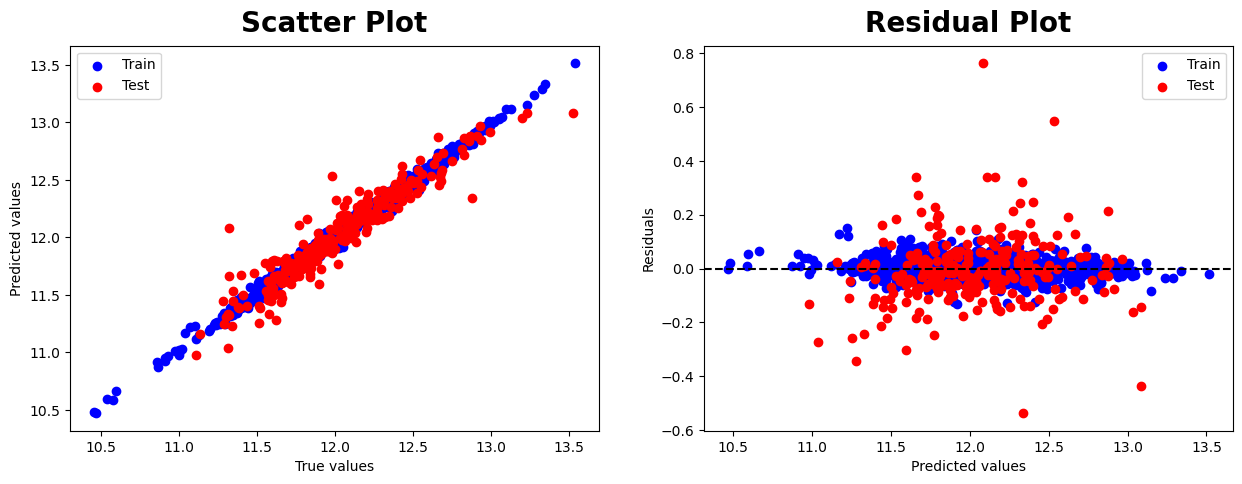

In [300]:
model_evaluation(CatBoostRegressor(verbose=False))

## Model's Performance Comparison

In [303]:
algos = ["LinearRegression","SVR","RandomForestRegresor","AdaBoostRegressor","GradientBosstRegressor",
         "LGBMRegressor","XGBosstRegressor","CatBoostRegressor"]

In [305]:
new_df = pd.DataFrame({"Model":algos,"R2_Score":r2_value,"Adjusted_R2_Score":adjusted_r2_value,
                       "MAE":mae_value,"MSE":mse_value,"RMSE":rmse_value})

In [307]:
new_df

Model  R2_Score  Adjusted_R2_Score       MAE       MSE  \
0        LinearRegression  0.791621           0.593031  0.095298  0.031548   
1                     SVR  0.883770           0.773001  0.093942  0.017597   
2    RandomForestRegresor  0.867370           0.740970  0.099181  0.020080   
3       AdaBoostRegressor  0.810260           0.629434  0.127748  0.028726   
4  GradientBosstRegressor  0.878598           0.762899  0.096867  0.018380   
5           LGBMRegressor  0.875500           0.756850  0.097461  0.018849   
6        XGBosstRegressor  0.879062           0.763805  0.096330  0.018310   
7       CatBoostRegressor  0.897896           0.800589  0.083750  0.015458   

       RMSE  
0  0.177618  
1  0.132654  
2  0.141704  
3  0.169488  
4  0.135573  
5  0.137292  
6  0.135314  
7  0.124331

📊 **Inference:**
- The best performing model is **CatBoostRegressor with highest R2 & Adjusted_R2 Scores and lowest MAE,MSE,RMSE values.**
- The second & third best performing model is **GradientBoostingRegressor & LGBMRegressor models.**
- So we will perform **Hyper-Parameter-Tunning** on this three model to obatain more accurate results.

## Model Hyper-Parameter Tunning 

### 1. Hyper-Parameter Tunning of CatBoost Regressor Model

In [313]:
catboost_model = CatBoostRegressor(verbose=False)

In [315]:
parameters1 = {"n_estimators":[50,100,150],
               "random_state":[0,42,50],
               "learning_rate":[0.1,0.3,0.5,1.0]}

In [317]:
grid_search = GridSearchCV(catboost_model, parameters1 , cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000014BA74FDDF0>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 1.0],
                         'n_estimators': [50, 100, 150],
                         'random_state': [0, 42, 50]})

In [319]:
best_parameters = grid_search.best_params_
best_parameters

{'learning_rate': 0.1, 'n_estimators': 150, 'random_state': 42}

#### Creating CatBoost Regressor model using Best Parameters.

In [322]:
catboost_model = CatBoostRegressor(**best_parameters, verbose=False)

In [324]:
catboost_model.fit(x_train,y_train)

In [326]:
y_pred = catboost_model.predict(x_test)

In [328]:
print("R2_Score of model is:",r2_score(y_test,y_pred))
print("RMSE Score of model is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adjusted_R2_Score of model is:",1-((1-r2_score(y_test,y_pred))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2_Score of model is: 0.8926133004836846
RMSE Score of model is: 0.1275074065351162
Adjusted_R2_Score of model is: 0.7902716136963236


### 2. Hyper-Parameter Tunning of Gradient Boosting Regressor Model.

In [331]:
gradient_model = GradientBoostingRegressor()

In [333]:
parameters2 = {"loss":['squared_error', 'absolute_error', 'huber', 'quantile'],
               "learning_rate":[0.1,0.3,0.5,1.0],
               "n_estimators":[50,100,150],
               "random_state":[0,42,45,50]}

In [335]:
grid_search_2 = GridSearchCV(gradient_model, parameters2, cv=5)
grid_search_2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 1.0],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'n_estimators': [50, 100, 150],
                         'random_state': [0, 42, 45, 50]})

In [337]:
best_parameters2 = grid_search_2.best_params_
best_parameters2

{'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 150, 'random_state': 0}

#### Creating GradientBossting Regressor Model Using Best-Parameters

In [340]:
gradient_model = GradientBoostingRegressor(**best_parameters)

In [342]:
gradient_model.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=150, random_state=42)

In [344]:
y_pred2 = gradient_model.predict(x_test)

In [346]:
print("R2_Score of model is:",r2_score(y_test,y_pred2))
print("RMSE Score of model is:",np.sqrt(mean_squared_error(y_test,y_pred2)))
print("Adjusted_R2_Score of model is:",1-((1-r2_score(y_test,y_pred2))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2_Score of model is: 0.8821350562388823
RMSE Score of model is: 0.13358339958560858
Adjusted_R2_Score of model is: 0.7698073917148641


### 3. Hyper-Parameter Tunning of LGBM Regressor Model.

In [349]:
lgbm_model = LGBMRegressor()

In [351]:
parameters3 = {"boosting_type":['gbdt','dart','goss','rf'],
               "learning_rate":[0.1,0.3,0.5,1.0],
               "random_state":[0,42,45,50]}

In [353]:
grid_search_3 = GridSearchCV(lgbm_model, parameters3, cv=5)
grid_search_3.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2933
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 109
[LightGBM] [Info] Start training from score 12.023679
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2936
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 110
[LightGBM] [Info] Start training from score 12.021019
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2931
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 109
[LightGBM] [Info] Start trai

C:\Users\Casey\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Casey\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Casey\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 1189, in fit
    super().fit(
  File "C:\Users\Casey\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 955, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Casey\anaconda3\Lib\site-packages\lightg

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
                         'learning_rate': [0.1, 0.3, 0.5, 1.0],
                         'random_state': [0, 42, 45, 50]})

In [355]:
best_parameters3 = grid_search_3.best_params_
best_parameters3

{'boosting_type': 'goss', 'learning_rate': 0.1, 'random_state': 0}

#### Creating LGBM Model using Best Parameters

In [358]:
lgbm_model = LGBMRegressor(**best_parameters3)

In [360]:
lgbm_model.fit(x_train,y_train)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3197
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 111
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 12.023362
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

LGBMRegressor(boosting_type='goss', random_state=0)

In [362]:
y_pred3 = lgbm_model.predict(x_test)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


In [364]:
print("R2_Score of model is:",r2_score(y_test,y_pred3))
print("RMSE Score of model is:",np.sqrt(mean_squared_error(y_test,y_pred3)))
print("Adjusted_R2_Score of model is:",1-((1-r2_score(y_test,y_pred3))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2_Score of model is: 0.8696983120680679
RMSE Score of model is: 0.14045434728507392
Adjusted_R2_Score of model is: 0.7455181799450186


## Creating Stacked Model

In [367]:
stack_model = StackingCVRegressor(regressors=(catboost_model,gradient_model,lgbm_model),
                                  meta_regressor = catboost_model,
                                  use_features_in_secondary=True)

In [369]:
stack_model.fit(x_train,y_train)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2933
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 108
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 12.033340
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

StackingCVRegressor(meta_regressor=<catboost.core.CatBoostRegressor object at 0x0000014BA75C2A20>,
                    regressors=(<catboost.core.CatBoostRegressor object at 0x0000014BA75C2A20>,
                                GradientBoostingRegressor(n_estimators=150,
                                                          random_state=42),
                                LGBMRegressor(boosting_type='goss',
                                              random_state=0)),
                    use_features_in_secondary=True)

In [371]:
y_pred = stack_model.predict(x_test)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


In [373]:
print("R2_Score of model is:",r2_score(y_test,y_pred))
print("RMSE Score of model is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adjusted_R2_Score of model is:",1-((1-r2_score(y_test,y_pred))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2_Score of model is: 0.8876507961140827
RMSE Score of model is: 0.13042029094441607
Adjusted_R2_Score of model is: 0.7805797427462957


📊 **Inference:**
- The model demonstrates a **strong correlation (R2 Score) of 0.876** between predicted and actual house prices.
- The **RMSE Score of 0.137** indicates a low average error in the model's predictions.
- The **Adjusted R2 Score of 0.756** accounts for the number of predictors in the model, providing a reliable measure of its performance.
- These results highlight the model's high accuracy and reliability in predicting house prices.

The model's performance can guide homeowners, buyers, and real estate professionals in making informed decisions regarding property values.

## Predicting Test Dataset using Stacked Model

In [377]:
test_preds = stack_model.predict(test_df)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


In [379]:
sdf = test_id.to_frame()
sdf["SalePrice"] = np.floor(np.expm1(test_preds))

In [381]:
sdf

Id  SalePrice
0     1461   134593.0
1     1462   174477.0
2     1463   203696.0
3     1464   208693.0
4     1465   203545.0
...    ...        ...
1454  2915    78922.0
1455  2916    85357.0
1456  2917   193429.0
1457  2918   126712.0
1458  2919   222015.0

[1459 rows x 2 columns]